In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

c:\Users\Nino\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data = pd.read_csv('raw_data.csv').drop_duplicates(subset =['Symbol'])
changes = pd.read_csv('changes2.csv').drop_duplicates(subset =['Symbol'])

In [4]:
data, changes = data.round(2), changes.round(2)

In [5]:
data

,Unnamed: 0,Company_Name,Symbol,Market_Cap,Ent_Value,Close,Rev,EBITDA,T_PE,F_PE,...,Day_High,ND_to_EBITDA,PCT_Below_Low,PCT_to_Low,PCT_to_Mean,Net_Debt,Last_Update,Opportunity Type,SP500,S&P500
0,0,"Agilent Technologies, Inc.",A,34,36,121,6,1,27.76,21.4,...,123.28,1.15,-0.10,0.11,0.24,2.073000e+09,3/12/2025,Neutral,S&P 500,S&P 500
1,1,Alcoa Corporation,AA,8,9,30,11,1,122.92,10.0,...,32.43,1.10,-0.23,0.29,0.55,1.718000e+09,3/12/2025,Neutral,No S&P 500,No S&P 500
2,2,"American Airlines Group, Inc.",AAL,7,37,12,54,5,9.24,5.7,...,12.54,5.33,-0.11,0.12,0.66,2.992600e+10,3/12/2025,Neutral,No S&P 500,No S&P 500
3,3,"AAON, Inc.",AAON,6,6,79,1,0,40.79,28.1,...,83.50,0.14,-0.17,0.20,0.38,3.714100e+07,3/12/2025,Neutral,No S&P 500,No S&P 500
4,4,Advance Auto Parts Inc.,AAP,2,4,36,9,0,NaN,13.6,...,38.20,7.14,1.81,-0.64,0.14,2.278437e+09,3/12/2025,Neutral,No S&P 500,No S&P 500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,1951,"Zoom Communications, Inc.",ZM,22,14,73,4,0,22.79,13.8,...,74.87,-8.24,0.05,-0.05,0.24,-7.727277e+09,3/12/2025,Neutral,No S&P 500,No S&P 500
1952,1952,"Zscaler, Inc.",ZS,30,28,194,2,0,NaN,56.0,...,202.64,32.44,-0.00,0.00,0.21,-1.641898e+09,3/12/2025,Good Opp,No S&P 500,No S&P 500
1953,1953,ZTO Express (Cayman) Inc.,ZTO,16,11,20,41,14,13.56,10.0,...,20.56,-0.33,-0.01,0.01,0.32,-4.626692e+09,3/12/2025,Good Opp,No S&P 500,No S&P 500
1954,1954,Zoetis Inc.,ZTS,73,78,171,9,3,30.05,25.9,...,171.82,1.26,0.00,-0.00,0.18,4.842000e+09,3/12/2025,Good Opp,S&P 500,S&P 500


In [66]:
# Plot sum of Market Cap by US state on a geographic map (card)
import plotly.express as px

# Filter out rows with missing or non-US states
us_states = data['State'].dropna().unique()
# Remove any non-standard state entries (e.g., not 2-letter codes)
us_states = [s for s in us_states if isinstance(s, str) and len(s) == 2]

# Aggregate Market Cap by state
state_marketcap = (
    data[data['State'].isin(us_states)]
    .groupby('State', as_index=False)['Market_Cap']
    .sum()
)

# Plot using Plotly's choropleth for US states
fig = px.choropleth(
    state_marketcap,
    locations='State',
    locationmode='USA-states',
    color='Market_Cap',
    color_continuous_scale='Blues',
    scope='usa',
    labels={'Market_Cap': 'Total Market Cap'},
    title='Sum of Market Cap by US State'
)
fig.show()


In [68]:
# Plot sum of Employees (Empl_K) by US state on a larger geographic map (card)
import plotly.express as px

# Filter out rows with missing or non-US states
us_states = data['State'].dropna().unique()
us_states = [s for s in us_states if isinstance(s, str) and len(s) == 2]

# Aggregate Employees by state (Empl_K is in thousands, so multiply by 1000 for total employees)
state_employees = (
    data[data['State'].isin(us_states)]
    .groupby('State', as_index=False)['Empl_K']
    .sum()
)
state_employees['Total_Employees'] = state_employees['Empl_K'] * 1000

# Plot using Plotly's choropleth for US states with a larger figure size
fig = px.choropleth(
    state_employees,
    locations='State',
    locationmode='USA-states',
    color='Total_Employees',
    color_continuous_scale='Greens',
    scope='usa',
    labels={'Total_Employees': 'Total Employees'},
    title='Sum of Employees by US State',
)

# Make the map larger
fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()



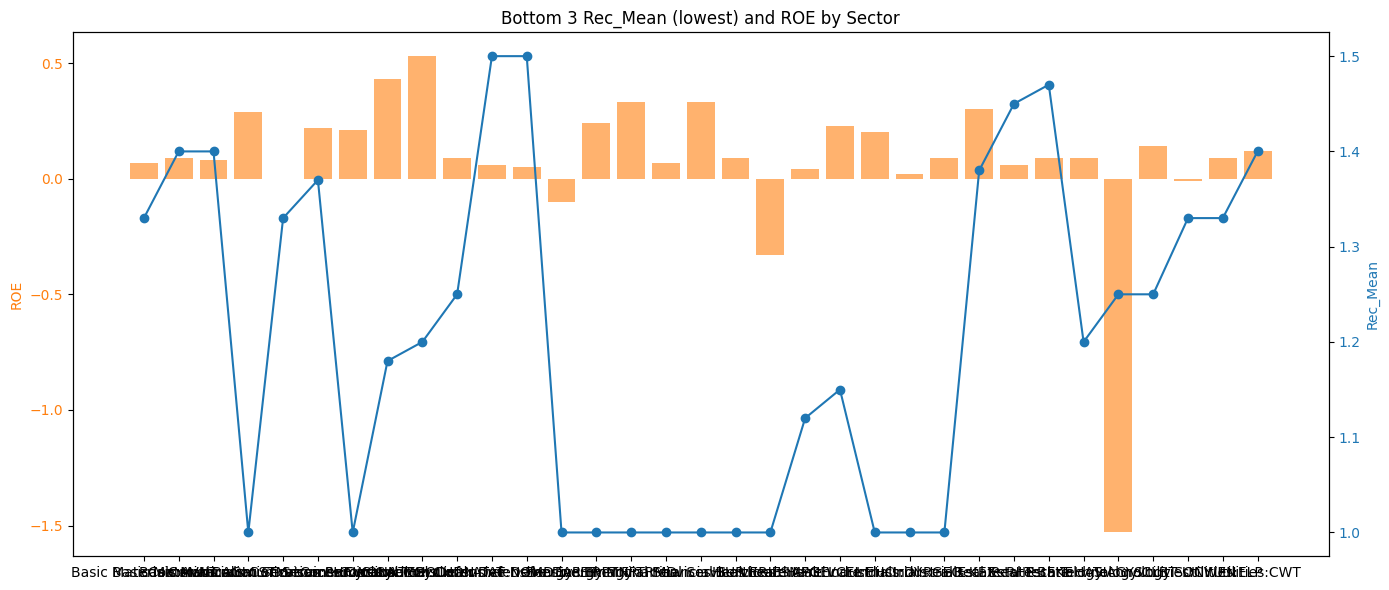

In [65]:
# Get bottom 3 companies by Rec_Mean (lowest) from every sector, include ROE
bottom3_by_sector = (
    data
    .sort_values(['Sector', 'Rec_Mean'], ascending=[True, True])
    .groupby('Sector')
    .head(3)
    .loc[:, ['Sector', 'Company_Name', 'Symbol', 'Rec_Mean', 'ROE']]
    .sort_values(['Sector', 'Rec_Mean'], ascending=[True, True])
    .reset_index(drop=True)
)

# Plot Rec_Mean as line and ROE as bars with two axes on one graphic
plt.figure(figsize=(14, 6))

# X axis: company (Sector:Symbol)
x_labels = bottom3_by_sector['Sector'] + ':' + bottom3_by_sector['Symbol']
x = np.arange(len(x_labels))

ax1 = plt.gca()
color1 = 'tab:blue'
color2 = 'tab:orange'

# Bar plot for ROE
ax1.bar(x, bottom3_by_sector['ROE'], color=color2, alpha=0.6, label='ROE')
ax1.set_ylabel('ROE', color=color2)
ax1.tick_params(axis='y', labelcolor=color2)

# Line plot for Rec_Mean
ax2 = ax1.twinx()
ax2.plot(x, bottom3_by_sector['Rec_Mean'], color=color1, marker='o', label='Rec_Mean')
ax2.set_ylabel('Rec_Mean', color=color1)
ax2.tick_params(axis='y', labelcolor=color1)

# X axis labels
plt.xticks(x, x_labels, rotation=90)
plt.title('Bottom 3 Rec_Mean (lowest) and ROE by Sector')
plt.tight_layout()
plt.show()




In [23]:
data.columns

Index(['Unnamed: 0', 'Company_Name', 'Symbol', 'Market_Cap', 'Ent_Value',
       'Close', 'Rev', 'EBITDA', 'T_PE', 'F_PE', 'ROE', 'ROA', '50D_Avg',
       '200D_Avg', 'Rec_Mean', 'Rec_Key', 'Sector', 'Industry', '52W_Low',
       '52W_High', 'T_EPS', 'F_EPS', 'Target_HP', 'Target_LP', 'Target_Mean_P',
       'Target_Median_P', 'Anlsts', 'Total_Cash', 'Vol_M', 'Total_Debt',
       'Quick_Ratio', 'Current_Ratio', 'Beta', 'D_to_E', 'Reg_Vol', 'Avg_Vol',
       'Payout_Ratio', '52W_Change', 'Book_Value', 'Price_to_Book', 'Empl_K',
       'State', 'Country', 'Web_Site', 'Business_Summary', 'Audit_Risk',
       'Board_Risk', 'Comp_Risk', 'SH_Rights_Risk', 'Overall_Risk', 'Div_Rate',
       'Div_Y', 'Ex_Div_Date', '5Y_Avg_Div_Y', 'PS_T_12M', 'T_An_Div_Rate',
       'T_An_Div_Y', 'Profit_Mgn', 'Float_Shares', 'Shares_Outst',
       'Shares_Short', 'Short_Ratio', 'Short_Pct_Of_Float',
       'Last_Fiscal_Year_End', 'Next_Fiscal_Year_End', 'Most_Recent_Quarter',
       'Earnings_Quarterly_Growth

Top 5 by Industry with highest Quick Ratio:


,Industry,Company_Name,Symbol,Quick_Ratio
0,Advertising Agencies,"Ziff Davis, Inc.",ZD,1.30
1,Advertising Agencies,Criteo S.A.,CRTO,1.12
2,Advertising Agencies,"Interpublic Group of Companies,",IPG,1.02
3,Advertising Agencies,WPP plc,WPP,0.87
4,Advertising Agencies,Omnicom Group Inc.,OMC,0.83
...,...,...,...,...
643,Waste Management,"Clean Harbors, Inc.",CLH,1.78
644,Waste Management,"Casella Waste Systems, Inc.",CWST,1.75
645,Waste Management,"Waste Management, Inc.",WM,0.66
646,Waste Management,"Waste Connections, Inc.",WCN,0.56


Bottom 5 by Industry with lowest Quick Ratio:


,Industry,Company_Name,Symbol,Quick_Ratio
0,Advertising Agencies,Omnicom Group Inc.,OMC,0.83
1,Advertising Agencies,WPP plc,WPP,0.87
2,Advertising Agencies,"Interpublic Group of Companies,",IPG,1.02
3,Advertising Agencies,Criteo S.A.,CRTO,1.12
4,Advertising Agencies,"Ziff Davis, Inc.",ZD,1.30
...,...,...,...,...
643,Waste Management,GFL Environmental Inc. Subordin,GFL,0.44
644,Waste Management,"Republic Services, Inc.",RSG,0.52
645,Waste Management,"Waste Connections, Inc.",WCN,0.56
646,Waste Management,"Waste Management, Inc.",WM,0.66


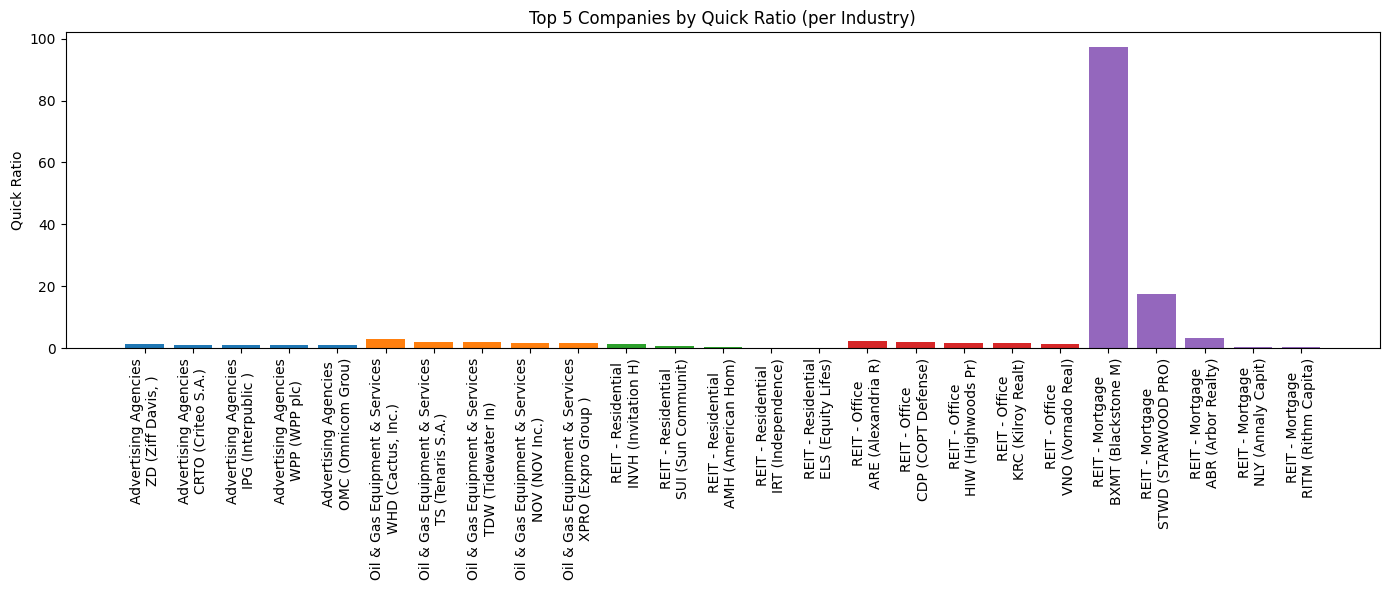

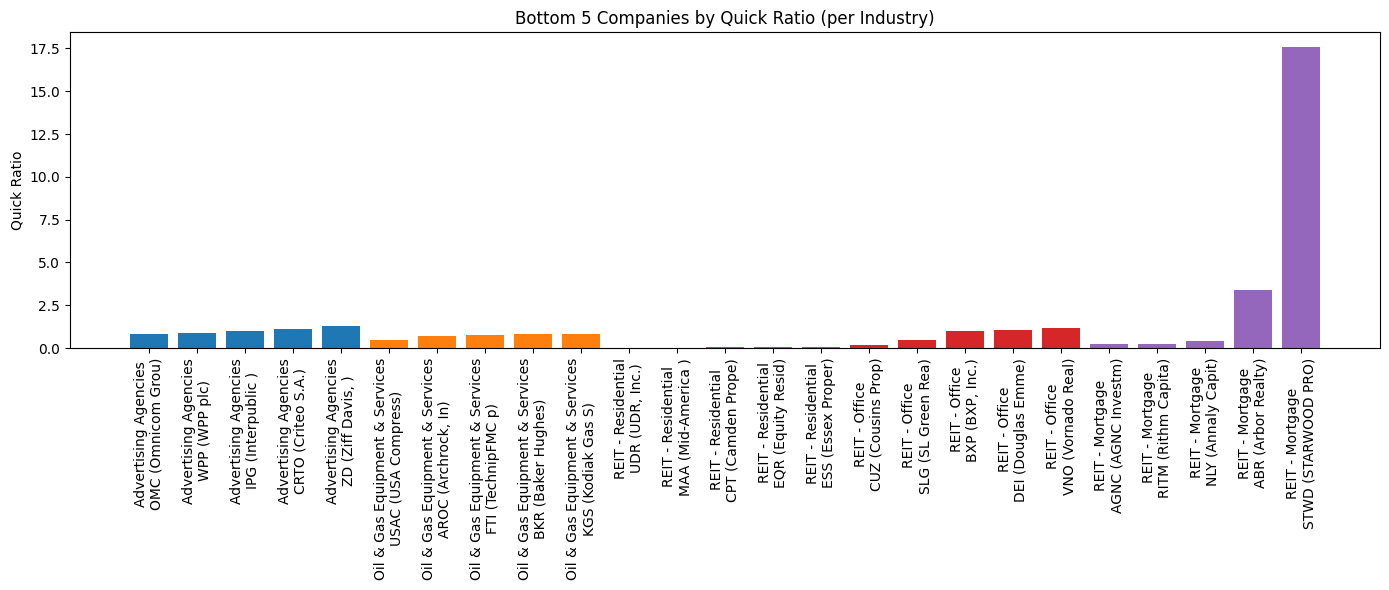

In [107]:
# Top 5 by Industry with highest Quick Ratio
top5_quick_by_industry = (
    data
    .sort_values(['Industry', 'Quick_Ratio'], ascending=[True, False])
    .groupby('Industry')
    .head(5)
    .loc[:, ['Industry', 'Company_Name', 'Symbol', 'Quick_Ratio']]
    .reset_index(drop=True)
)
print("Top 5 by Industry with highest Quick Ratio:")
display(top5_quick_by_industry)

# Bottom 5 by Industry with lowest Quick Ratio
bottom5_quick_by_industry = (
    data
    .sort_values(['Industry', 'Quick_Ratio'], ascending=[True, True])
    .groupby('Industry')
    .head(5)
    .loc[:, ['Industry', 'Company_Name', 'Symbol', 'Quick_Ratio']]
    .reset_index(drop=True)
)
print("Bottom 5 by Industry with lowest Quick Ratio:")
display(bottom5_quick_by_industry)

# Plot as bar chart: Top 5 by Industry
import matplotlib.pyplot as plt

# For visualization, let's plot for a few industries (otherwise too many bars)
industries_to_plot = top5_quick_by_industry['Industry'].value_counts().index[:5]
top5_plot = top5_quick_by_industry[top5_quick_by_industry['Industry'].isin(industries_to_plot)]

plt.figure(figsize=(14, 6))
for i, industry in enumerate(industries_to_plot):
    subset = top5_plot[top5_plot['Industry'] == industry]
    x_labels = subset['Symbol'] + ' (' + subset['Company_Name'].str[:12] + ')'
    plt.bar(
        [f"{industry}\n{s}" for s in x_labels],
        subset['Quick_Ratio'],
        label=industry
    )
plt.ylabel('Quick Ratio')
plt.title('Top 5 Companies by Quick Ratio (per Industry)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot as bar chart: Bottom 5 by Industry
industries_to_plot_btm = bottom5_quick_by_industry['Industry'].value_counts().index[:5]
bottom5_plot = bottom5_quick_by_industry[bottom5_quick_by_industry['Industry'].isin(industries_to_plot_btm)]

plt.figure(figsize=(14, 6))
for i, industry in enumerate(industries_to_plot_btm):
    subset = bottom5_plot[bottom5_plot['Industry'] == industry]
    x_labels = subset['Symbol'] + ' (' + subset['Company_Name'].str[:12] + ')'
    plt.bar(
        [f"{industry}\n{s}" for s in x_labels],
        subset['Quick_Ratio'],
        label=industry
    )
plt.ylabel('Quick Ratio')
plt.title('Bottom 5 Companies by Quick Ratio (per Industry)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



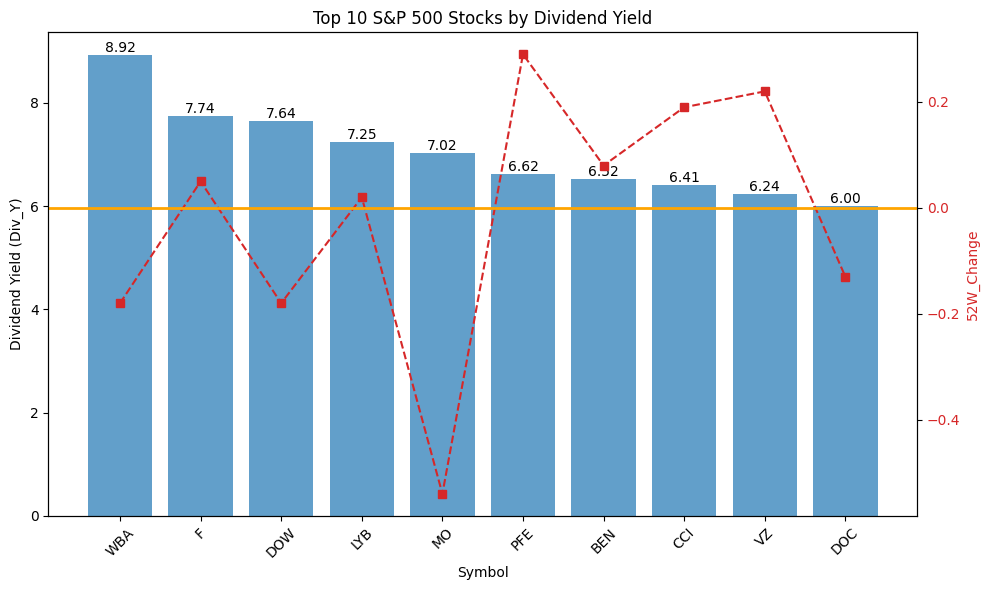

In [85]:
# Top 10 S&P 500 stocks by Dividend Yield (Div_Y) - Bar Chart
sp500_mask = data['S&P500'] == 'S&P 500'
top10_divy = (
    data.loc[sp500_mask]
        .sort_values('Div_Y', ascending=False)
        .head(10)
        .loc[:, ['Company_Name', 'Symbol', 'Div_Y', 'Sector']]
        .reset_index(drop=True)
)

plt.figure(figsize=(10, 6))
bars = plt.bar(
    top10_divy['Symbol'],
    top10_divy['Div_Y'],
    color='tab:blue',
    alpha=0.7
)
plt.ylabel('Dividend Yield (Div_Y)')
plt.xlabel('Symbol')
plt.title('Top 10 S&P 500 Stocks by Dividend Yield')
plt.xticks(rotation=45)
# Annotate bars with dividend yield values
for bar, val in zip(bars, top10_divy['Div_Y']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{val:.2f}",
        ha='center', va='bottom', fontsize=10
    )
# Add a second y-axis for 52W_Change
ax3 = plt.gca().twinx()
ax3.plot(
    top10_divy['Symbol'],
    data.loc[top10_divy.index, '52W_Change'],
    color='tab:red',
    marker='s',
    linestyle='--',
    label='52W_Change'
)
ax3.set_ylabel('52W_Change', color='tab:red')
ax3.tick_params(axis='y', labelcolor='tab:red')

# Add orange line for 0 52W_Change
ax3.axhline(0, color='orange', linestyle='-', linewidth=2, label='0 52W_Change')

plt.tight_layout()
plt.show()



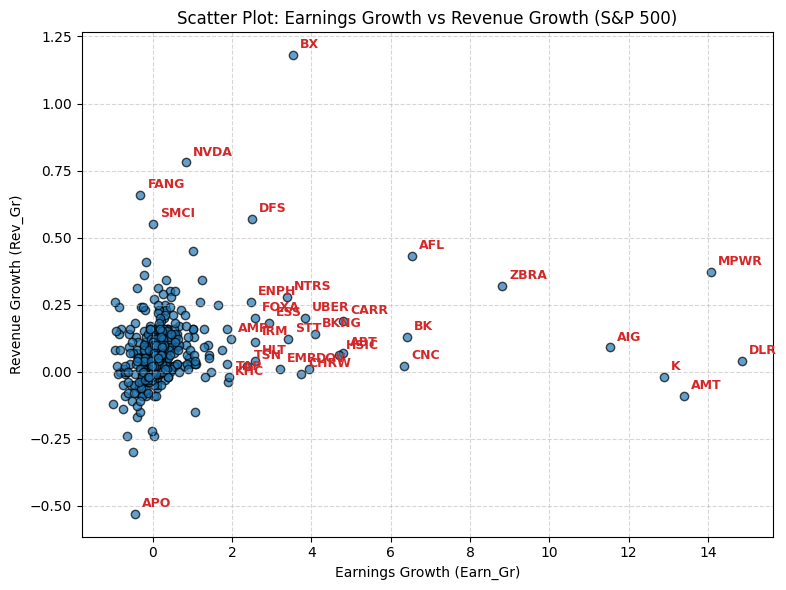

In [90]:
# Scatter plot: Revenue Growth vs Earnings Growth (S&P 500 only), with axes swapped
# Only annotate serious outliers (beyond 3*IQR)

# Filter for S&P 500 companies
sp500_mask = data['S&P500'] == 'S&P 500'
sp500_data = data.loc[sp500_mask]

x = sp500_data['Earn_Gr']
y = sp500_data['Rev_Gr']

plt.figure(figsize=(8, 6))
plt.scatter(
    x,
    y,
    alpha=0.7,
    color='tab:blue',
    edgecolor='k'
)
plt.xlabel('Earnings Growth (Earn_Gr)')
plt.ylabel('Revenue Growth (Rev_Gr)')
plt.title('Scatter Plot: Earnings Growth vs Revenue Growth (S&P 500)')
plt.grid(True, linestyle='--', alpha=0.5)

# Identify serious outliers: 3*IQR rule for both axes
def get_serious_outlier_mask(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 3 * iqr
    upper = q3 + 3 * iqr
    return (series < lower) | (series > upper)

serious_outlier_mask = get_serious_outlier_mask(x) | get_serious_outlier_mask(y)
serious_outliers = sp500_data[serious_outlier_mask]

# Annotate only serious outliers with ticker (Symbol)
for _, row in serious_outliers.iterrows():
    plt.annotate(
        row['Symbol'],
        (row['Earn_Gr'], row['Rev_Gr']),
        textcoords="offset points",
        xytext=(5,5),
        ha='left',
        fontsize=9,
        color='tab:red',
        weight='bold'
    )

plt.tight_layout()
plt.show()





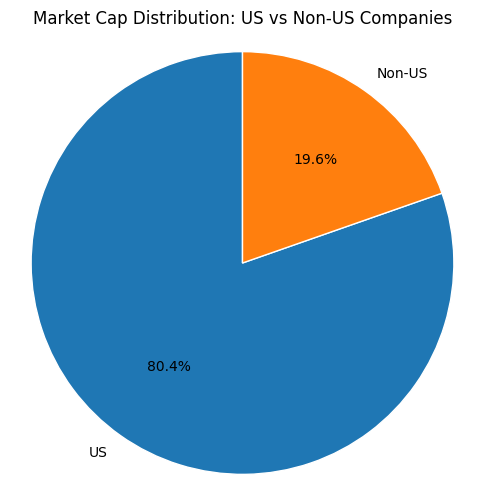

In [79]:
# Pie chart of Market Cap: US vs Non-US (based on 'Country' feature)

# Create a boolean mask for US companies
is_us = data['Country'] == 'United States'

# Calculate total market cap for US and Non-US
us_market_cap = data.loc[is_us, 'Market_Cap'].sum()
nonus_market_cap = data.loc[~is_us, 'Market_Cap'].sum()

labels = ['US', 'Non-US']
sizes = [us_market_cap, nonus_market_cap]
colors = ['tab:blue', 'tab:orange']

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Market Cap Distribution: US vs Non-US Companies')
plt.axis('equal')
plt.show()


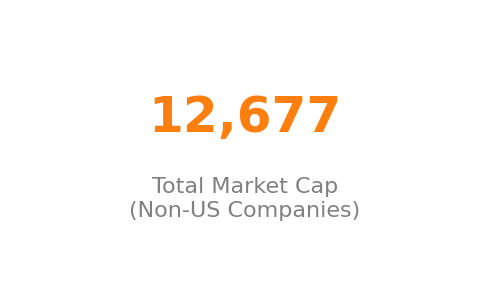

In [82]:
# Card-style plot: Show the sum of Market Cap for Non-US companies as a "card" (big number in a box)

nonus_market_cap = data.loc[data['Country'] != 'United States', 'Market_Cap'].sum()

plt.figure(figsize=(5, 3))
plt.gca().axis('off')
plt.gca().set_facecolor('white')
plt.text(
    0.5, 0.6,
    f"{nonus_market_cap:,.0f}",
    fontsize=36, fontweight='bold', color='tab:orange',
    ha='center', va='center'
)
plt.text(
    0.5, 0.3,
    "Total Market Cap\n(Non-US Companies)",
    fontsize=16, color='gray',
    ha='center', va='center'
)
plt.box(False)
plt.tight_layout()
plt.show()


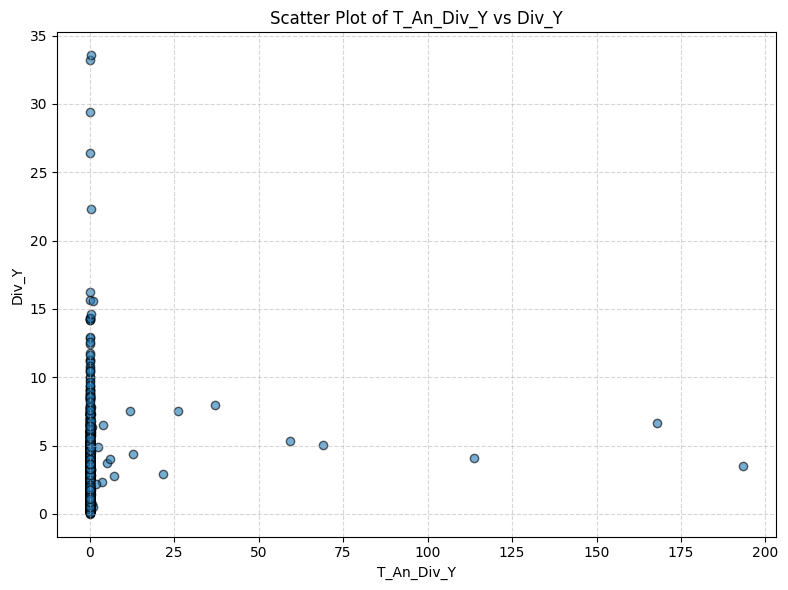

In [78]:
# Scatter plot for T_An_Div_Y vs Div_Y

plt.figure(figsize=(8, 6))
plt.scatter(data['T_An_Div_Y'], data['Div_Y'], alpha=0.6, c='tab:blue', edgecolors='k')
plt.xlabel('T_An_Div_Y')
plt.ylabel('Div_Y')
plt.title('Scatter Plot of T_An_Div_Y vs Div_Y')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


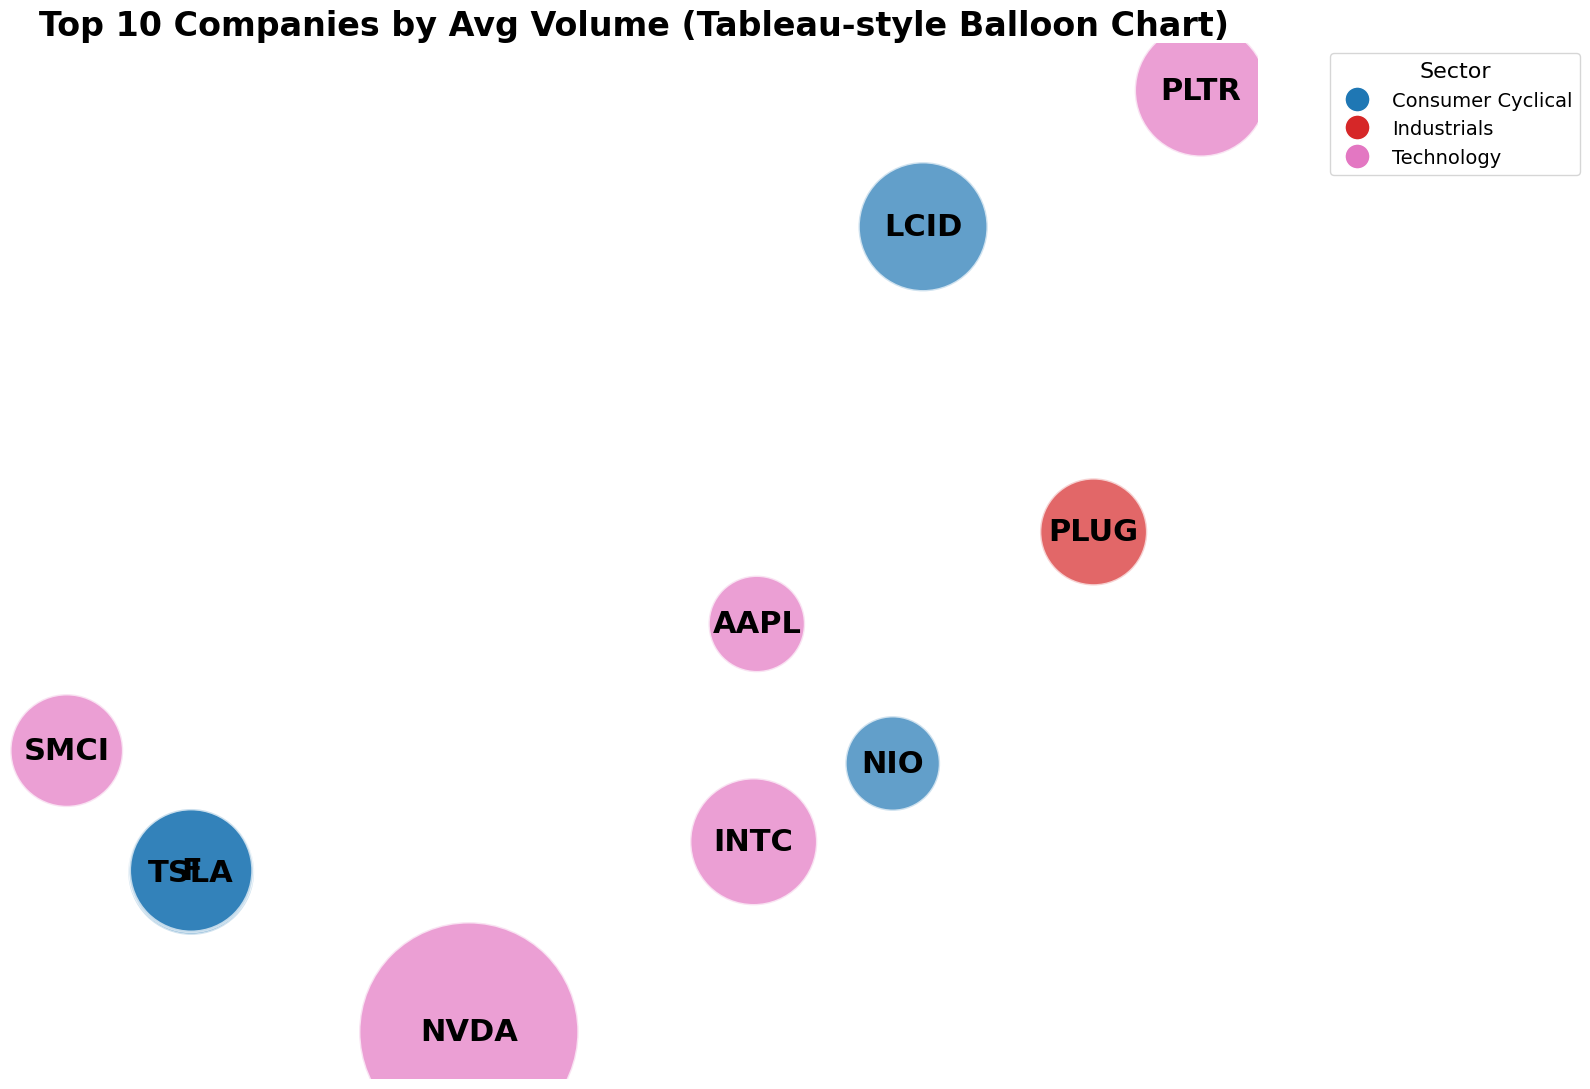

,Company_Name,Symbol,Avg_Vol,Market_Cap,Sector
1244,NVIDIA Corporation,NVDA,268,2653,Technology
1373,Palantir Technologies Inc.,PLTR,98,183,Technology
1025,"Lucid Group, Inc.",LCID,93,6,Consumer Cyclical
915,Intel Corporation,INTC,90,85,Technology
1741,"Tesla, Inc.",TSLA,88,741,Consumer Cyclical
647,Ford Motor Company,F,84,38,Consumer Cyclical
1574,"Super Micro Computer, Inc.",SMCI,71,24,Technology
1374,"Plug Power, Inc.",PLUG,64,1,Industrials
5,Apple Inc.,AAPL,52,3317,Technology
1211,NIO Inc.,NIO,50,10,Consumer Cyclical


In [74]:
# Balloon chart (bubble chart) of top 10 companies by average volume (Avg_Vol)
# Tableau-style: no axes, bubbles sized by Avg_Vol, colored by Sector, labeled by Symbol
# "Make bigger": increase bubble size (not figure size)

top10_vol = data.nlargest(10, 'Avg_Vol').copy()

plt.figure(figsize=(16, 11))  # Keep figure size large for clarity
ax = plt.gca()

# Generate random positions for bubbles (Tableau style: freeform layout)
np.random.seed(42)
top10_vol['x'] = np.random.uniform(0, 1, size=len(top10_vol))
top10_vol['y'] = np.random.uniform(0, 1, size=len(top10_vol))

# Map sector to color
sector_cats = top10_vol['Sector'].astype('category')
colors = plt.cm.tab10(sector_cats.cat.codes / sector_cats.cat.categories.size)

# Bubble chart (make bubbles much bigger)
scatter = ax.scatter(
    top10_vol['x'],
    top10_vol['y'],
    s=top10_vol['Avg_Vol'] / top10_vol['Avg_Vol'].max() * 25000,  # Much bigger bubbles
    c=colors,
    alpha=0.7,
    edgecolors='w',
    linewidths=2
)

# Add symbol labels inside bubbles
for _, row in top10_vol.iterrows():
    ax.text(
        row['x'],
        row['y'],
        row['Symbol'],
        ha='center',
        va='center',
        fontsize=22,  # Bigger font
        color='black',
        weight='bold'
    )

# Remove axes for Tableau-like look
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.box(False)
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Companies by Avg Volume (Tableau-style Balloon Chart)', fontsize=24, weight='bold')

# Legend for sectors
handles = []
for code, sector in enumerate(sector_cats.cat.categories):
    handles.append(
        plt.Line2D([0], [0], marker='o', color='w',
                   label=sector,
                   markerfacecolor=plt.cm.tab10(code / sector_cats.cat.categories.size), markersize=18)
    )
plt.legend(handles=handles, title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)

plt.tight_layout()
plt.show()

# Show the top 10 companies by Avg_Vol
display(top10_vol[['Company_Name', 'Symbol', 'Avg_Vol', 'Market_Cap', 'Sector']])





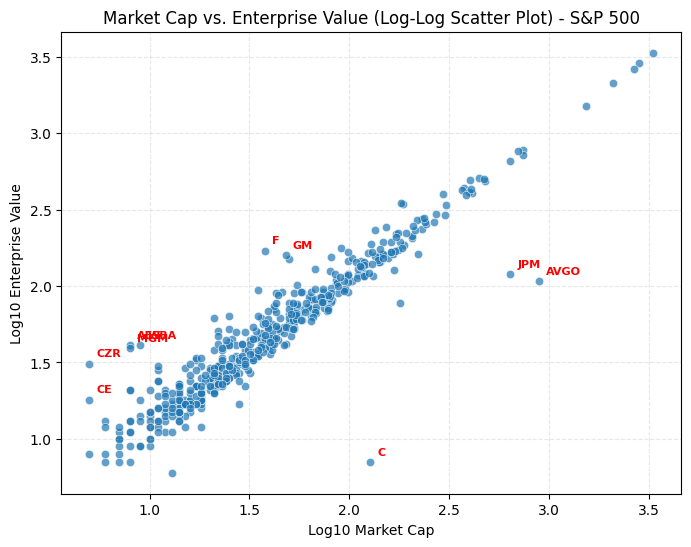

In [53]:
# Filter for S&P 500 companies
sp500_data = data[data['SP500'] == 'S&P 500'].copy()

# Remove non-positive values before log transform
sp500_data = sp500_data[(sp500_data['Market_Cap'] > 0) & (sp500_data['Ent_Value'] > 0)]

# Log transform
sp500_data['log_Market_Cap'] = np.log10(sp500_data['Market_Cap'])
sp500_data['log_Ent_Value'] = np.log10(sp500_data['Ent_Value'])

plt.figure(figsize=(8,6))
ax = sns.scatterplot(
    x='log_Market_Cap', 
    y='log_Ent_Value', 
    data=sp500_data, 
    alpha=0.7
)
plt.xlabel('Log10 Market Cap')
plt.ylabel('Log10 Enterprise Value')
plt.title('Market Cap vs. Enterprise Value (Log-Log Scatter Plot) - S&P 500')
plt.grid(True, linestyle='--', alpha=0.3)

# Identify outliers: those farthest from the y=x line in log space
residuals = (sp500_data['log_Ent_Value'] - sp500_data['log_Market_Cap']).abs()
outlier_count = 10 if len(sp500_data) > 10 else len(sp500_data)
outlier_idx = residuals.nlargest(outlier_count).index

for i in outlier_idx:
    row = sp500_data.loc[i]
    plt.annotate(
        row['Symbol'],
        (row['log_Market_Cap'], row['log_Ent_Value']),
        textcoords="offset points",
        xytext=(5,5),
        ha='left',
        fontsize=8,
        color='red',
        weight='bold'
    )

plt.show()







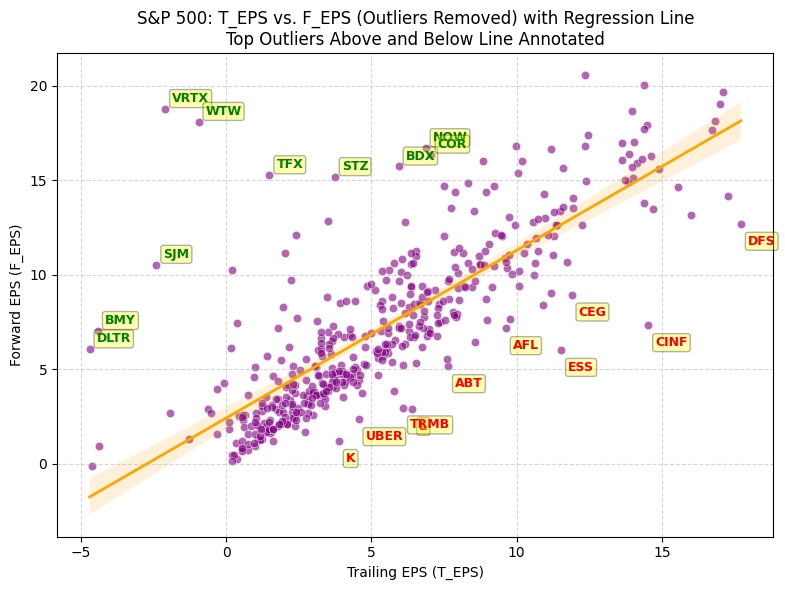

In [40]:
# Scatter plot of T_EPS vs. F_EPS for S&P 500 companies, with outliers removed, regression line,
# and annotation of stocks that are farthest above and below the regression line (both sides).

# Filter for S&P 500 companies
sp500_data = data[data['SP500'] == 'S&P 500']

# Remove outliers using the IQR method for both T_EPS and F_EPS
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

cols = ['T_EPS', 'F_EPS']
sp500_eps = sp500_data[['T_EPS', 'F_EPS', 'Symbol', 'Company_Name']].dropna()
sp500_eps_no_outliers = remove_outliers_iqr(sp500_eps, ['T_EPS', 'F_EPS'])

# Fit regression line
from scipy.stats import linregress
reg = linregress(sp500_eps_no_outliers['T_EPS'], sp500_eps_no_outliers['F_EPS'])
slope, intercept = reg.slope, reg.intercept

# Calculate signed residuals (vertical distance from regression line)
sp500_eps_no_outliers = sp500_eps_no_outliers.copy()
sp500_eps_no_outliers['reg_pred'] = slope * sp500_eps_no_outliers['T_EPS'] + intercept
sp500_eps_no_outliers['residual'] = sp500_eps_no_outliers['F_EPS'] - sp500_eps_no_outliers['reg_pred']

# Annotate the top N farthest above and below the regression line
n_annotate = 10  # Increased from 5 to 10 for "more on both side"
top_above = sp500_eps_no_outliers.nlargest(n_annotate, 'residual')
top_below = sp500_eps_no_outliers.nsmallest(n_annotate, 'residual')

plt.figure(figsize=(8,6))
sns.scatterplot(x='T_EPS', y='F_EPS', data=sp500_eps_no_outliers, color='purple', alpha=0.6)
sns.regplot(x='T_EPS', y='F_EPS', data=sp500_eps_no_outliers, scatter=False, color='orange', line_kws={'linewidth':2})

# Annotate the most "vertically away" points on both sides
for _, row in top_above.iterrows():
    plt.annotate(
        row['Symbol'],
        (row['T_EPS'], row['F_EPS']),
        textcoords="offset points",
        xytext=(5,5),
        ha='left',
        fontsize=9,
        color='green',
        weight='bold',
        bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.3)
    )
for _, row in top_below.iterrows():
    plt.annotate(
        row['Symbol'],
        (row['T_EPS'], row['F_EPS']),
        textcoords="offset points",
        xytext=(5,-15),
        ha='left',
        fontsize=9,
        color='red',
        weight='bold',
        bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.3)
    )

plt.title('S&P 500: T_EPS vs. F_EPS (Outliers Removed) with Regression Line\nTop Outliers Above and Below Line Annotated')
plt.xlabel('Trailing EPS (T_EPS)')
plt.ylabel('Forward EPS (F_EPS)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()








Correlation matrix for Gross_Mgn, EBITDA_Mgn, Operating_Mgn:
               Gross_Mgn  EBITDA_Mgn  Operating_Mgn
Gross_Mgn       1.000000    0.359676       0.008997
EBITDA_Mgn      0.359676    1.000000       0.029166
Operating_Mgn   0.008997    0.029166       1.000000


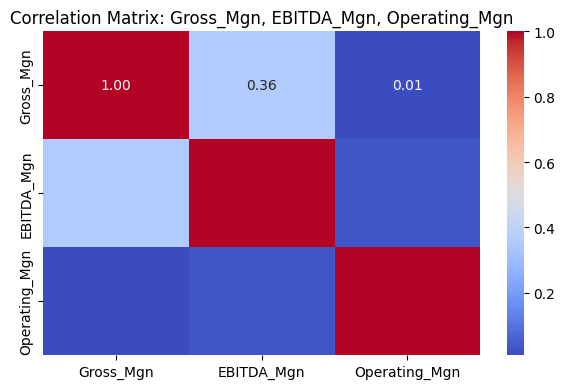

In [33]:
# Correlation matrix for selected margin columns
margin_cols = ['Gross_Mgn', 'EBITDA_Mgn', 'Operating_Mgn']
corr_matrix = data[margin_cols].corr()
print("Correlation matrix for Gross_Mgn, EBITDA_Mgn, Operating_Mgn:")
print(corr_matrix)

# Optional: visualize the correlation matrix as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Gross_Mgn, EBITDA_Mgn, Operating_Mgn')
plt.tight_layout()
plt.show()


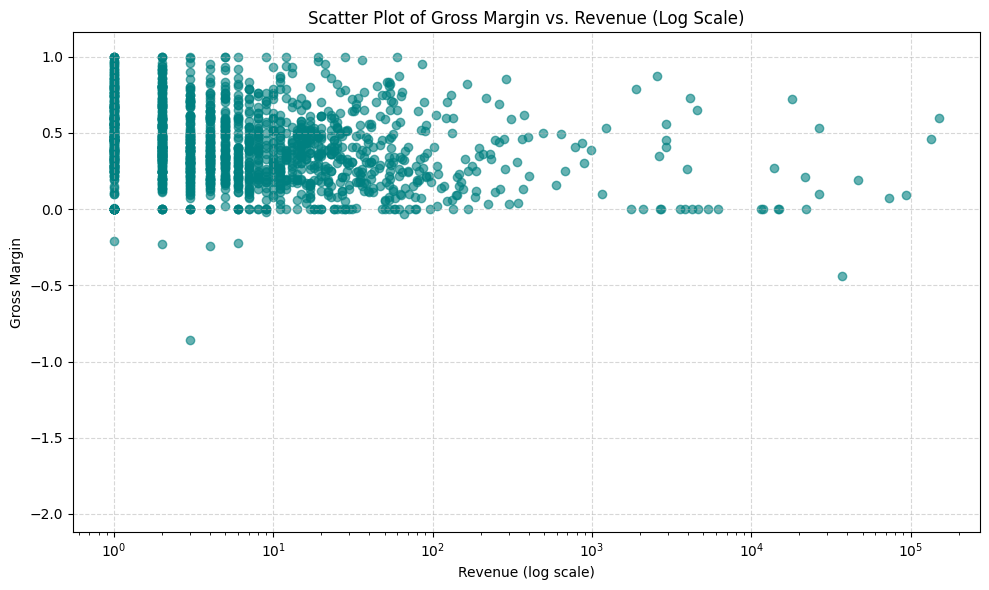

In [32]:
# Scatter plot of Gross Margin vs. Revenue (log scale for Revenue)
plt.figure(figsize=(10,6))
plt.scatter(data['Rev'], data['Gross_Mgn'], alpha=0.6, color='teal')
plt.xscale('log')
plt.title('Scatter Plot of Gross Margin vs. Revenue (Log Scale)')
plt.xlabel('Revenue (log scale)')
plt.ylabel('Gross Margin')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



c:\Users\Nino\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


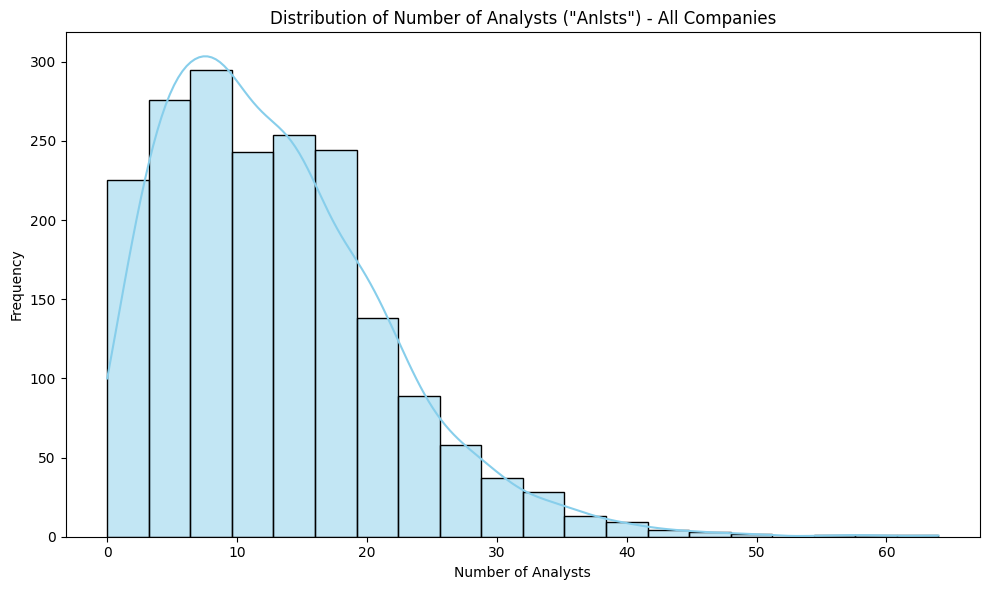

c:\Users\Nino\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


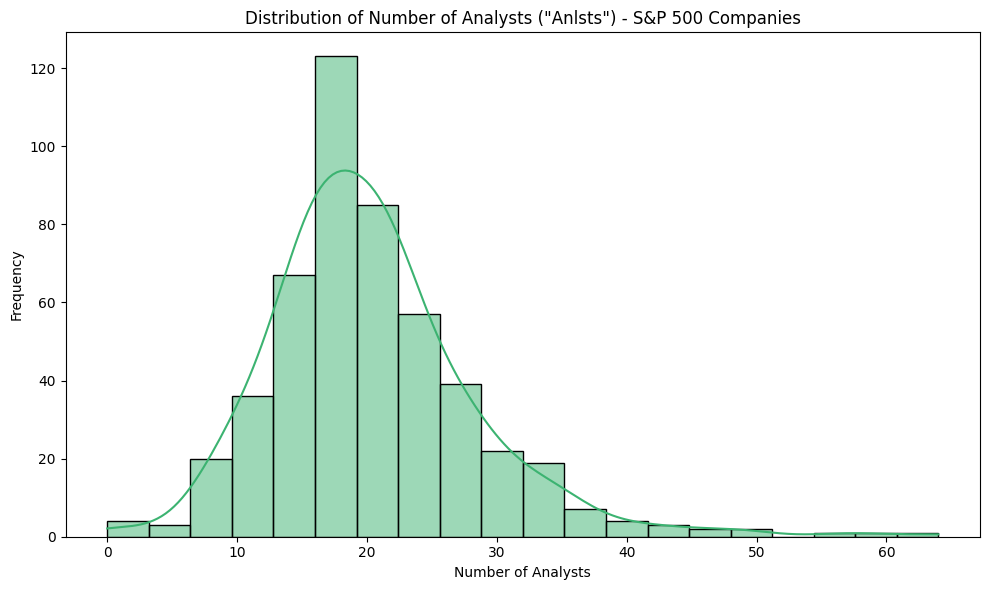

In [30]:
# Plot the statistical distribution of the 'Anlsts' column (number of analysts) for all companies
plt.figure(figsize=(10,6))
sns.histplot(data['Anlsts'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Number of Analysts ("Anlsts") - All Companies')
plt.xlabel('Number of Analysts')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot the statistical distribution of the 'Anlsts' column for S&P 500 companies only
sp500_data = data[data['SP500'] == 'S&P 500']
plt.figure(figsize=(10,6))
sns.histplot(sp500_data['Anlsts'].dropna(), bins=20, kde=True, color='mediumseagreen')
plt.title('Distribution of Number of Analysts ("Anlsts") - S&P 500 Companies')
plt.xlabel('Number of Analysts')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



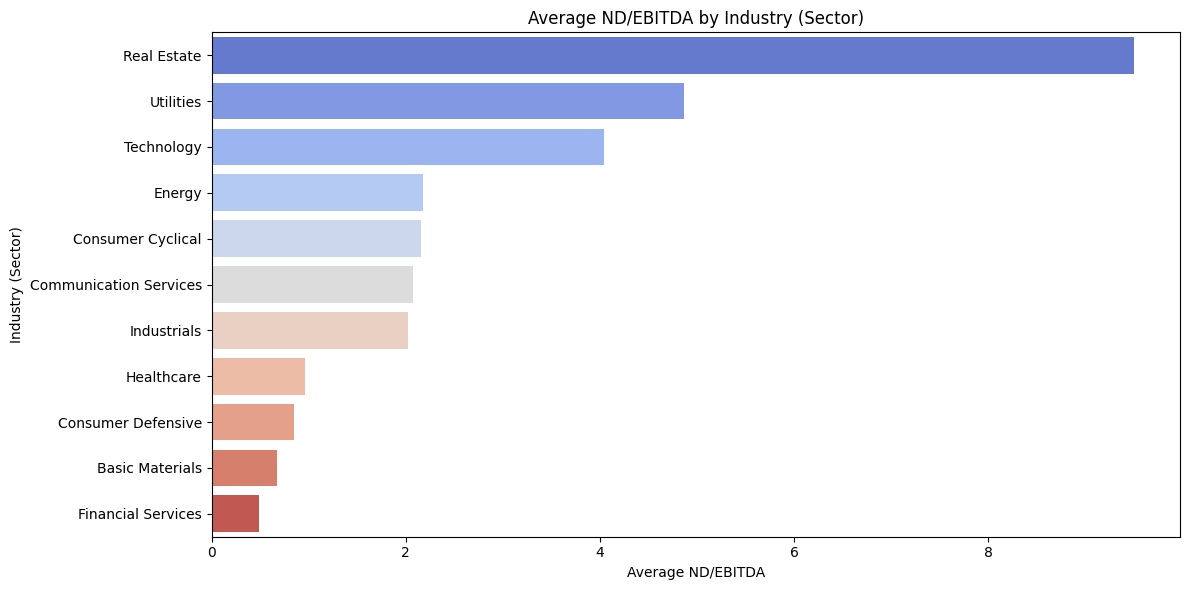

In [22]:
# Calculate the average ND_to_EBITDA by industry (Sector)
nd_to_ebitda_by_sector = data.groupby('Sector')['ND_to_EBITDA'].mean().sort_values(ascending=False)

# Plot the result
plt.figure(figsize=(12, 6))
sns.barplot(x=nd_to_ebitda_by_sector.values, y=nd_to_ebitda_by_sector.index, palette='coolwarm')
plt.xlabel('Average ND/EBITDA')
plt.ylabel('Industry (Sector)')
plt.title('Average ND/EBITDA by Industry (Sector)')
plt.tight_layout()
plt.show()


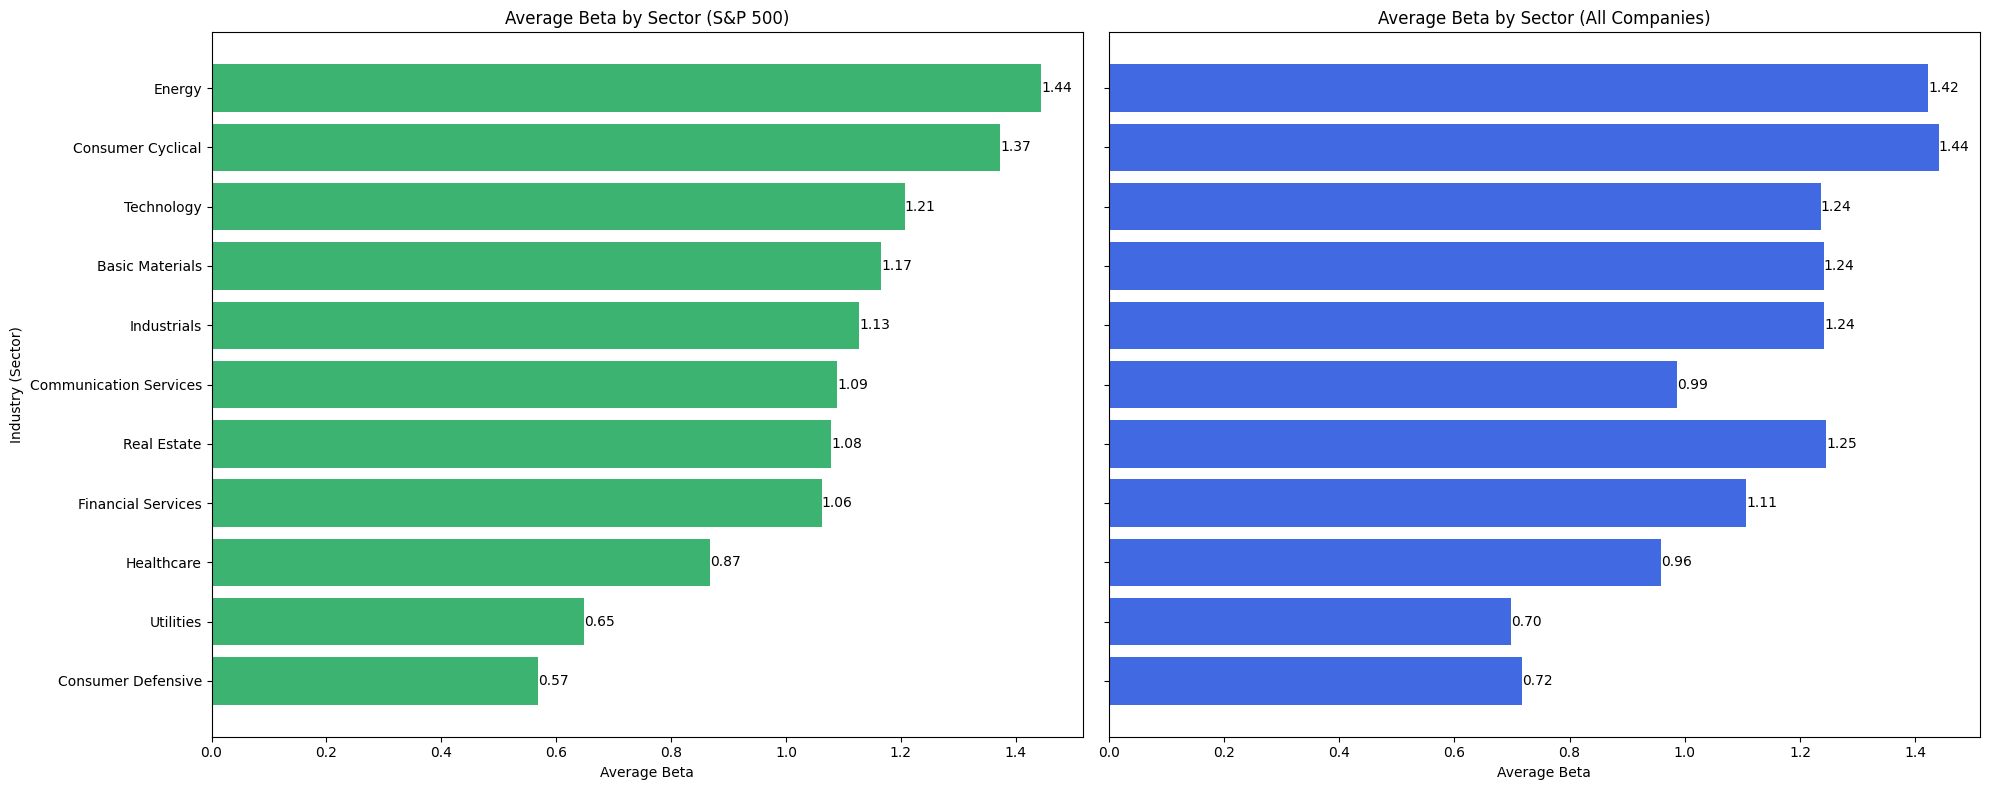

In [26]:
# Two graphics side by side: one for S&P 500, one for ALL data, both sorted ascending by average Beta, with values on bars

# Group by 'Sector' and average Beta for S&P 500 only, ascending
sp500_data = data[data['SP500'] == 'S&P 500']
beta_by_sector_sp500 = sp500_data.groupby('Sector')['Beta'].mean().sort_values(ascending=True)

# Group by 'Sector' and average Beta for ALL data, ascending
beta_by_sector_all = data.groupby('Sector')['Beta'].mean().sort_values(ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# S&P 500 plot
bars0 = axes[0].barh(beta_by_sector_sp500.index, beta_by_sector_sp500.values, color='mediumseagreen')
axes[0].set_title('Average Beta by Sector (S&P 500)')
axes[0].set_xlabel('Average Beta')
axes[0].set_ylabel('Industry (Sector)')
for bar in bars0:
    width = bar.get_width()
    axes[0].text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', ha='left', fontsize=10)

# ALL data plot
bars1 = axes[1].barh(beta_by_sector_all.index, beta_by_sector_all.values, color='royalblue')
axes[1].set_title('Average Beta by Sector (All Companies)')
axes[1].set_xlabel('Average Beta')
axes[1].set_ylabel('')
for bar in bars1:
    width = bar.get_width()
    axes[1].text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()




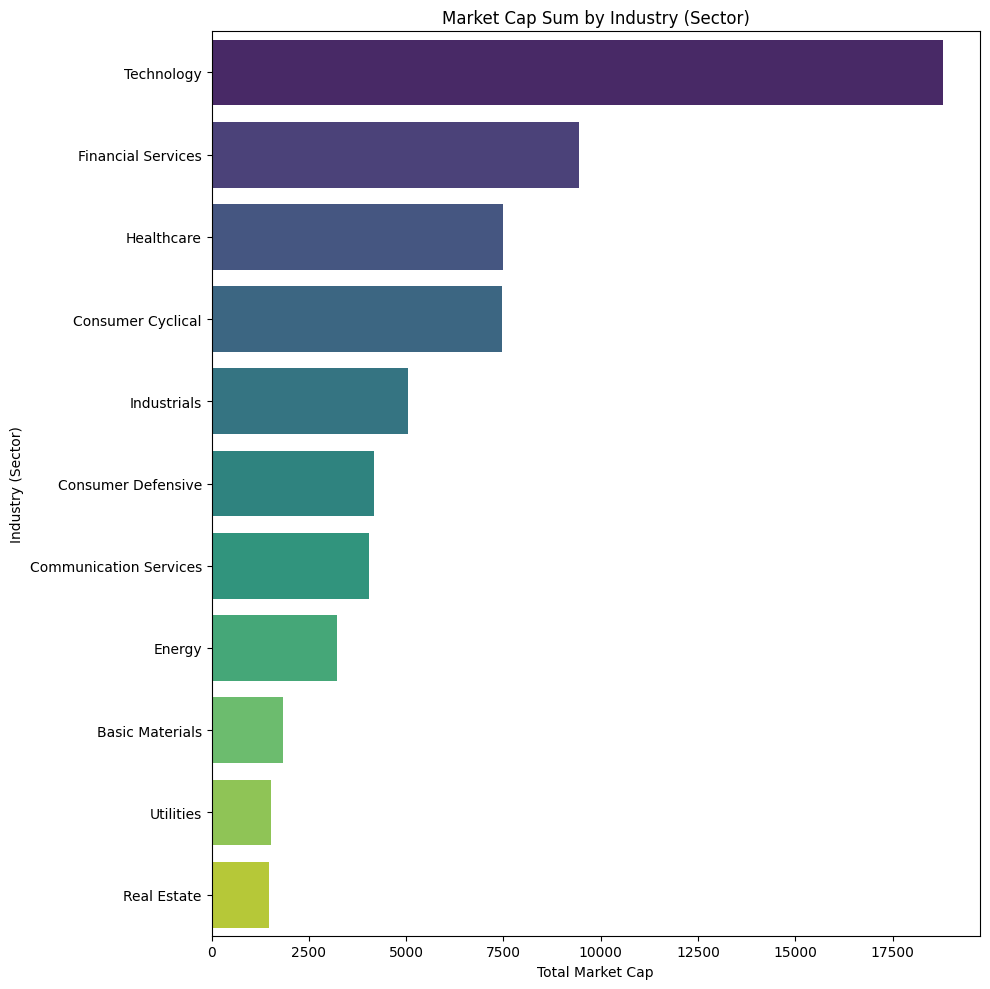

In [8]:
# Group by 'Sector' and sum Market Cap
industry_market_cap = data.groupby('Sector')['Market_Cap'].sum().sort_values(ascending=False)

# Bar plot (previous view)
plt.figure(figsize=(10, 10))
sns.barplot(x=industry_market_cap.values, y=industry_market_cap.index, palette='viridis')
plt.xlabel('Total Market Cap')
plt.ylabel('Industry (Sector)')
plt.title('Market Cap Sum by Industry (Sector)')
plt.tight_layout()
plt.show()




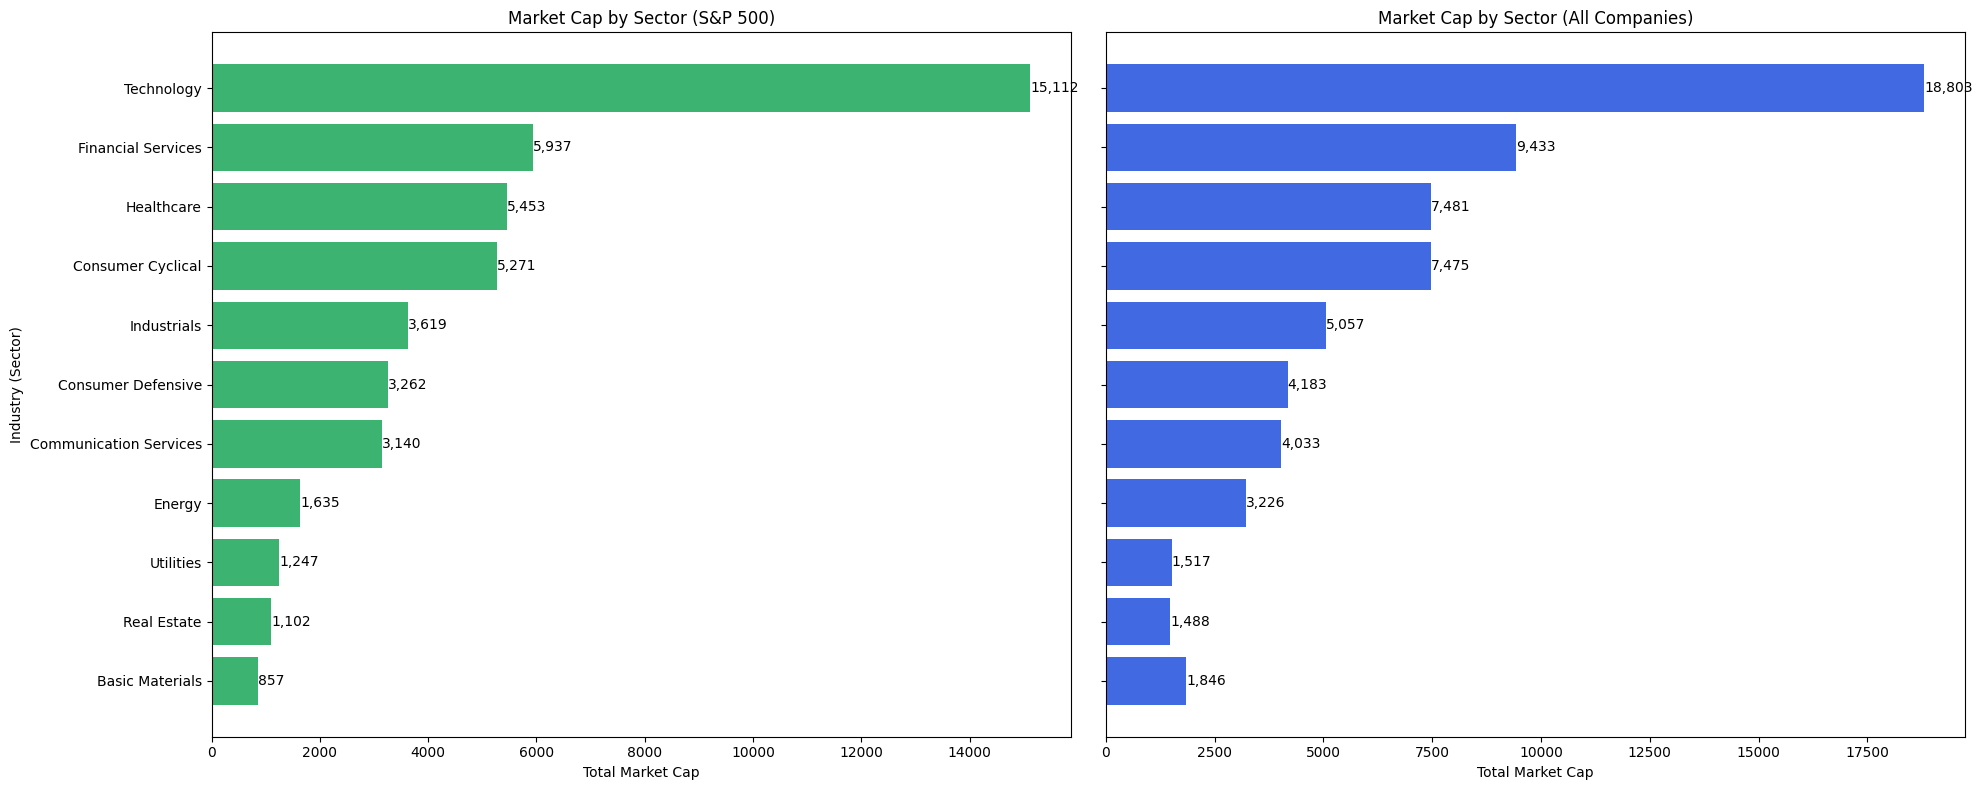

In [14]:
# Two graphics side by side: one for S&P 500, one for ALL data, both sorted descending, with values on bars

# Group by 'Sector' and sum Market Cap for S&P 500 only, descending
sp500_data = data[data['SP500'] == 'S&P 500']
industry_market_cap_sp500 = sp500_data.groupby('Sector')['Market_Cap'].sum().sort_values(ascending=True)  # ascending=True for barh

# Group by 'Sector' and sum Market Cap for ALL data, descending
industry_market_cap_all = data.groupby('Sector')['Market_Cap'].sum().sort_values(ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# S&P 500 plot
bars0 = axes[0].barh(industry_market_cap_sp500.index, industry_market_cap_sp500.values, color='mediumseagreen')
axes[0].set_title('Market Cap by Sector (S&P 500)')
axes[0].set_xlabel('Total Market Cap')
axes[0].set_ylabel('Industry (Sector)')
for bar in bars0:
    width = bar.get_width()
    axes[0].text(width, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', va='center', ha='left', fontsize=10)

# ALL data plot
bars1 = axes[1].barh(industry_market_cap_all.index, industry_market_cap_all.values, color='royalblue')
axes[1].set_title('Market Cap by Sector (All Companies)')
axes[1].set_xlabel('Total Market Cap')
axes[1].set_ylabel('')
for bar in bars1:
    width = bar.get_width()
    axes[1].text(width, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()







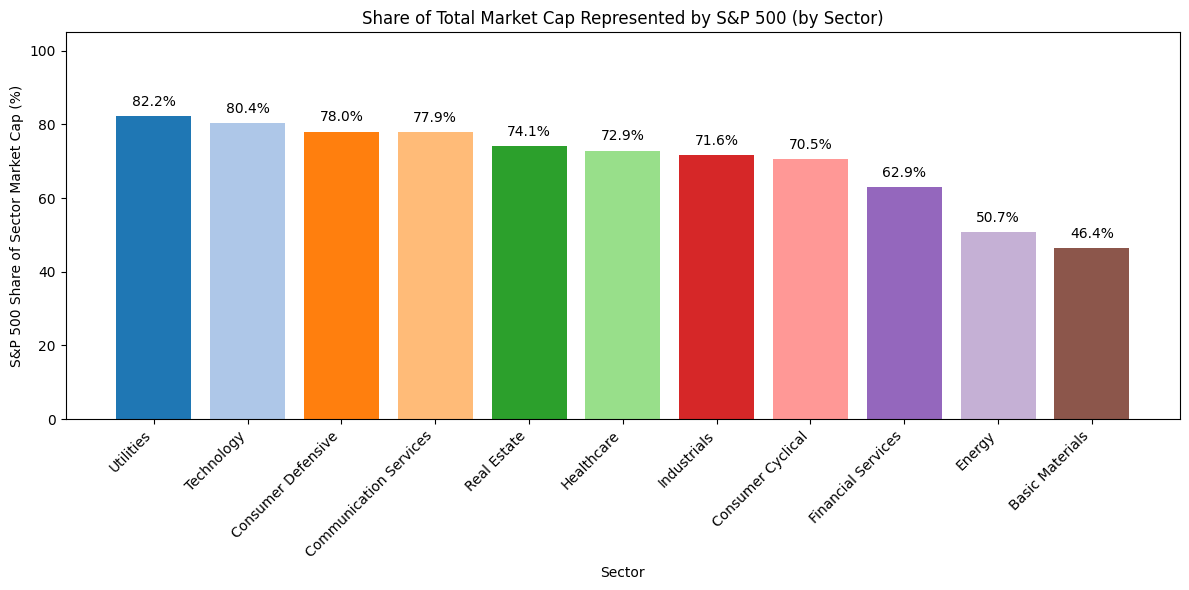

In [19]:
# For each sector, calculate the share of S&P 500 market cap vs total market cap

# If you filtered data to S&P 500 only above, reload the full dataset for this calculation
# (Assume the original full dataset is in a variable called 'data_all', otherwise use a copy of the current data before filtering)
if 'data_all' not in locals():
    try:
        data_all = pd.read_csv('your_full_data_file.csv')  # <-- replace with your actual file if needed
    except Exception:
        data_all = data.copy()  # fallback, but may be S&P 500 only

# Get all unique sectors as strings (drop NaN and convert to str)
sector_names = (
    data_all['Sector']
    .dropna()
    .astype(str)
    .unique()
    .tolist()
)

sp500_shares = []

for sector in sector_names:
    total_cap = data_all[data_all['Sector'] == sector]['Market_Cap'].sum()
    sp500_cap = data_all[(data_all['Sector'] == sector) & (data_all['SP500'] == 'S&P 500')]['Market_Cap'].sum()
    if total_cap > 0:
        share = sp500_cap / total_cap * 100
    else:
        share = 0
    sp500_shares.append(share)

# Sort by share descending for better visualization
sorted_pairs = sorted(zip(sector_names, sp500_shares), key=lambda x: x[1], reverse=True)
sector_names_sorted = [str(x[0]) for x in sorted_pairs]
sp500_shares_sorted = [x[1] for x in sorted_pairs]

# Use a colormap for different colors
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.get_cmap('tab20')
colors = [cmap(i % 20) for i in range(len(sector_names_sorted))]

plt.figure(figsize=(12, 6))
bars = plt.bar(sector_names_sorted, sp500_shares_sorted, color=colors)
plt.ylabel('S&P 500 Share of Sector Market Cap (%)')
plt.xlabel('Sector')
plt.title('Share of Total Market Cap Represented by S&P 500 (by Sector)')
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')

# Annotate bars with percentage values
for bar, share in zip(bars, sp500_shares_sorted):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{share:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()





In [17]:
data = data.query('SP500 == "S&P 500"')
data

,Unnamed: 0,Company_Name,Symbol,Market_Cap,Ent_Value,Close,Rev,EBITDA,T_PE,F_PE,...,Day_High,ND_to_EBITDA,PCT_Below_Low,PCT_to_Low,PCT_to_Mean,Net_Debt,Last_Update,Opportunity Type,SP500,S&P500
0,0,"Agilent Technologies, Inc.",A,34,36,121,6,1,27.76,21.4,...,123.28,1.15,-0.10,0.11,0.24,2.073000e+09,3/12/2025,Neutral,S&P 500,S&P 500
5,5,Apple Inc.,AAPL,3317,3360,227,395,137,35.11,26.6,...,225.84,0.31,0.15,-0.13,0.11,4.302400e+10,3/12/2025,Neutral,S&P 500,S&P 500
7,7,AbbVie Inc.,ABBV,377,439,216,56,26,89.37,17.6,...,216.37,2.38,0.31,-0.24,-0.03,6.246400e+10,3/12/2025,Neutral,S&P 500,S&P 500
12,12,"Airbnb, Inc.",ABNB,77,69,132,11,2,30.52,27.9,...,130.77,-3.22,0.39,-0.28,0.19,-8.317000e+09,3/12/2025,Neutral,S&P 500,S&P 500
14,14,Abbott Laboratories,ABT,230,237,137,41,10,17.36,25.7,...,136.73,0.68,0.26,-0.21,-0.01,7.307000e+09,3/12/2025,Neutral,S&P 500,S&P 500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,1934,Xylem Inc.,XYL,30,31,128,8,1,33.87,26.0,...,127.77,0.79,0.12,-0.11,0.14,1.322000e+09,3/12/2025,Neutral,S&P 500,S&P 500
1939,1939,"Yum! Brands, Inc.",YUM,43,55,158,7,2,30.02,25.8,...,159.00,4.26,0.15,-0.13,-0.03,1.157400e+10,3/12/2025,Neutral,S&P 500,S&P 500
1943,1943,"Zimmer Biomet Holdings, Inc.",ZBH,21,27,110,7,2,24.23,12.5,...,110.17,2.35,0.05,-0.05,0.10,6.093700e+09,3/12/2025,Neutral,S&P 500,S&P 500
1944,1944,Zebra Technologies Corporation,ZBRA,14,15,283,4,0,27.54,17.5,...,284.59,1.56,-0.13,0.15,0.38,1.461000e+09,3/12/2025,Neutral,S&P 500,S&P 500


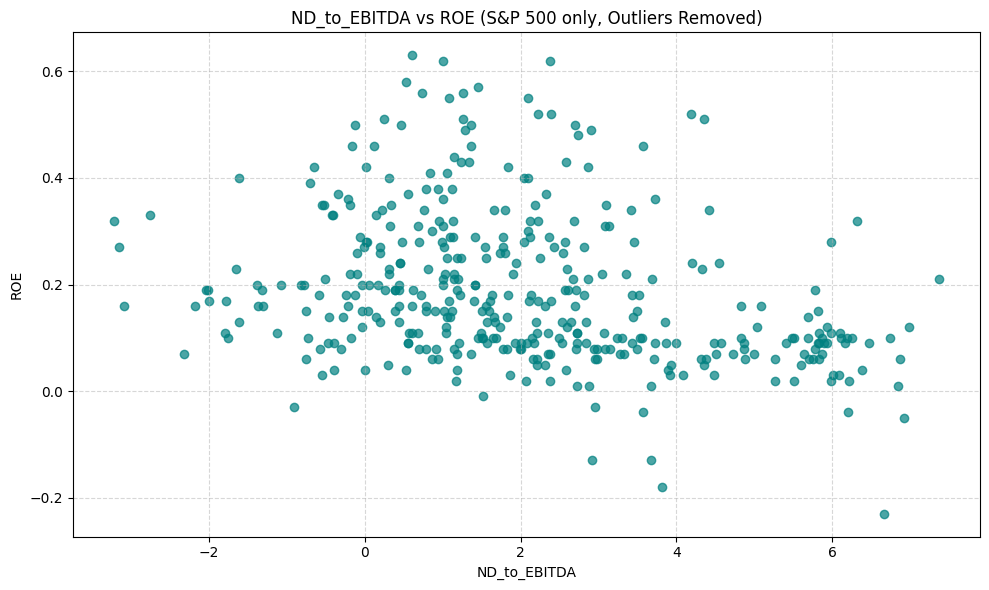

In [61]:
# Filter by S&P 500 (redundant if already filtered, but ensures correctness)
sp500_data = data[data['SP500'] == 'S&P 500']

# Remove outliers using IQR method for both ND_to_EBITDA and ROE
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

filtered = sp500_data.dropna(subset=['ND_to_EBITDA', 'ROE'])
filtered = remove_outliers_iqr(filtered, 'ND_to_EBITDA')
filtered = remove_outliers_iqr(filtered, 'ROE')

plt.figure(figsize=(10, 6))
plt.scatter(
    filtered['ND_to_EBITDA'],
    filtered['ROE'],
    color='teal', alpha=0.7
)
plt.xlabel('ND_to_EBITDA')
plt.ylabel('ROE')
plt.title('ND_to_EBITDA vs ROE (S&P 500 only, Outliers Removed)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()








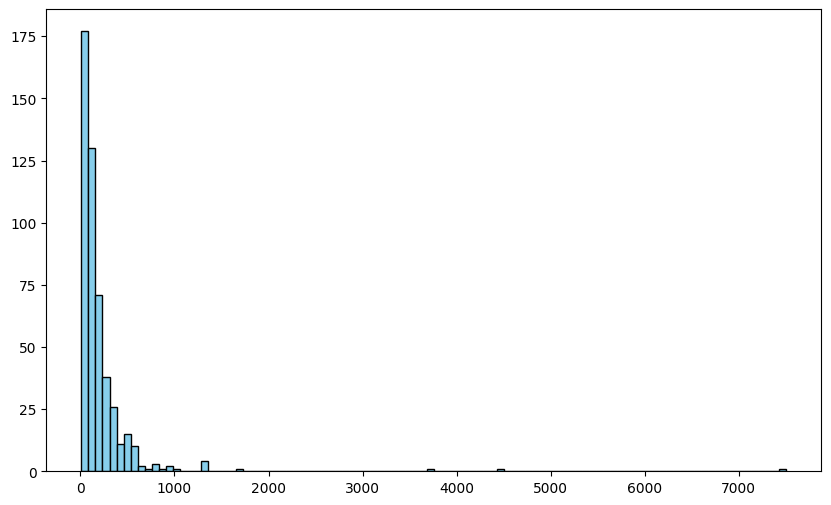

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(data["Close"], bins=100, color='skyblue', edgecolor='black')
plt.show()


In [41]:
data = pd.merge(data, changes, on='Symbol', how='left')
data

,Unnamed: 0,Company_Name,Symbol,Market_Cap,Ent_Value,Close,Rev,EBITDA,T_PE,F_PE,...,SP500,S&P500,Change_2d,Change_5d,Change_10d,Change_30d,Change_60d,Change_180d,MTD Change,YTD Change
0,0,"Agilent Technologies, Inc.",A,34,36,121,6,1,27.76,21.4,...,S&P 500,S&P 500,0.01,NaN,0.06,0.19,0.14,0.13,-0.05,-0.10
1,1,Alcoa Corporation,AA,8,9,30,11,1,122.92,10.0,...,No S&P 500,No S&P 500,-0.03,NaN,0.04,0.15,0.12,0.01,-0.04,-0.15
2,2,"American Airlines Group, Inc.",AAL,7,37,12,54,5,9.24,5.7,...,No S&P 500,No S&P 500,0.09,NaN,0.25,0.45,0.60,-0.07,-0.20,-0.34
3,3,"AAON, Inc.",AAON,6,6,79,1,0,40.79,28.1,...,No S&P 500,No S&P 500,-0.03,NaN,-0.07,0.37,0.48,0.14,0.07,-0.30
4,4,Advance Auto Parts Inc.,AAP,2,4,36,9,0,NaN,13.6,...,No S&P 500,No S&P 500,0.00,NaN,0.01,0.24,0.27,0.12,-0.01,-0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,1951,"Zoom Communications, Inc.",ZM,22,14,73,4,0,22.79,13.8,...,No S&P 500,No S&P 500,0.00,NaN,0.01,0.19,0.09,-0.08,-0.01,-0.10
1917,1952,"Zscaler, Inc.",ZS,30,28,194,2,0,NaN,56.0,...,No S&P 500,No S&P 500,-0.02,NaN,-0.02,0.07,-0.05,-0.15,0.02,0.11
1918,1953,ZTO Express (Cayman) Inc.,ZTO,16,11,20,41,14,13.56,10.0,...,No S&P 500,No S&P 500,0.02,NaN,-0.01,0.00,-0.09,0.12,0.01,0.01
1919,1954,Zoetis Inc.,ZTS,73,78,171,9,3,30.05,25.9,...,S&P 500,S&P 500,0.05,NaN,0.02,0.05,-0.01,0.16,-0.02,0.01


In [40]:
data.iloc[:, 1:21]

,Company_Name,Symbol,Market_Cap,Ent_Value,Close,Rev,EBITDA,T_PE,F_PE,ROE,ROA,50D_Avg,200D_Avg,Rec_Mean,Rec_Key,Sector,Industry,52W_Low,52W_High,T_EPS
0,"Agilent Technologies, Inc.",A,34,36,121,6,1,27.76,21.4,0.21,0.08,138,137,2.21,buy,Healthcare,Diagnostics & Research,119.30,155.35,4.36
5,Apple Inc.,AAPL,3317,3360,227,395,137,35.11,26.6,1.37,0.23,237,227,2.04,buy,Technology,Consumer Electronics,164.08,260.10,6.29
7,AbbVie Inc.,ABBV,377,439,216,56,26,89.37,17.6,0.62,0.08,188,183,1.96,buy,Healthcare,Drug Manufacturers - General,153.58,218.66,2.39
12,"Airbnb, Inc.",ABNB,77,69,132,11,2,30.52,27.9,0.32,0.08,136,135,2.57,hold,Consumer Cyclical,Travel Services,110.38,170.10,4.11
14,Abbott Laboratories,ABT,230,237,137,41,10,17.36,25.7,0.31,0.06,125,114,1.81,buy,Healthcare,Medical Devices,99.71,141.23,7.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,Xylem Inc.,XYL,30,31,128,8,1,33.87,26.0,0.08,0.04,124,130,2.00,buy,Industrials,Specialty Industrial Machinery,113.26,146.08,3.65
1939,"Yum! Brands, Inc.",YUM,43,55,158,7,2,30.02,25.8,NaN,0.24,139,135,2.62,hold,Consumer Cyclical,Restaurants,122.13,163.30,5.22
1943,"Zimmer Biomet Holdings, Inc.",ZBH,21,27,110,7,2,24.23,12.5,0.07,0.05,105,108,2.57,hold,Healthcare,Medical Devices,97.69,133.90,4.43
1944,Zebra Technologies Corporation,ZBRA,14,15,283,4,0,27.54,17.5,0.16,0.06,361,354,2.05,buy,Technology,Communication Equipment,266.75,427.76,10.18


In [34]:
data.iloc[:, 50:80]

,Div_Rate,Div_Y,Ex_Div_Date,5Y_Avg_Div_Y,PS_T_12M,T_An_Div_Rate,T_An_Div_Y,Profit_Mgn,Float_Shares,Shares_Outst,...,Ent_to_Rev,Ent_to_EBITDA,Last_Div_Value,Last_Div_Date,Gross_Profits,FCF,OCF,Earn_Gr,Rev_Gr,Gross_Mgn
0,0.99,0.82,4/1/2025,0.01,5.28,0.96,0.01,0.19,284,285,...,5,20.30,0.25,12/31/2024,3,1,1,-0.06,0.01,0.54
5,1.00,0.45,2/10/2025,0.01,8.38,0.99,0.00,0.24,14998,15022,...,8,24.47,0.25,2/10/2025,184,93,108,0.10,0.04,0.47
7,6.56,3.07,4/15/2025,0.04,6.69,6.29,0.03,0.08,1761,1765,...,7,16.77,1.64,1/15/2025,39,19,18,NaN,0.06,0.70
12,NaN,NaN,NaN,NaN,7.02,0.00,0.00,0.24,418,432,...,6,26.94,NaN,NaN,9,3,4,NaN,0.12,0.83
14,2.36,1.78,4/15/2025,0.02,5.48,2.24,0.02,0.32,1724,1734,...,5,22.18,0.59,1/15/2025,23,5,8,4.79,0.07,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,1.60,1.29,2/18/2025,0.01,3.51,1.44,0.01,0.10,241,243,...,3,18.78,0.40,2/18/2025,3,0,1,0.21,0.06,0.38
1939,2.84,1.81,2/21/2025,0.02,5.79,2.72,0.02,0.20,278,279,...,7,20.38,0.71,2/21/2025,3,1,1,-0.07,0.16,0.47
1943,0.96,0.89,3/31/2025,0.01,2.78,0.96,0.01,0.12,198,199,...,3,10.60,0.24,12/30/2024,5,1,1,-0.40,0.04,0.72
1944,NaN,NaN,NaN,NaN,2.89,0.00,0.00,0.11,50,51,...,3,16.93,NaN,NaN,2,0,1,8.82,0.32,0.48


In [42]:
data.dtypes

Unnamed: 0        int64
Company_Name     object
Symbol           object
Market_Cap        int64
Ent_Value         int64
                 ...   
Change_30d      float64
Change_60d      float64
Change_180d     float64
MTD Change      float64
YTD Change      float64
Length: 103, dtype: object

In [ ]:
nan = pd.DataFrame(data.isna().sum())
nan

,0
Unnamed: 0,0
Company_Name,0
Symbol,0
Market_Cap,0
Ent_Value,0
...,...
Change_30d,3
Change_60d,3
Change_180d,3
MTD Change,3


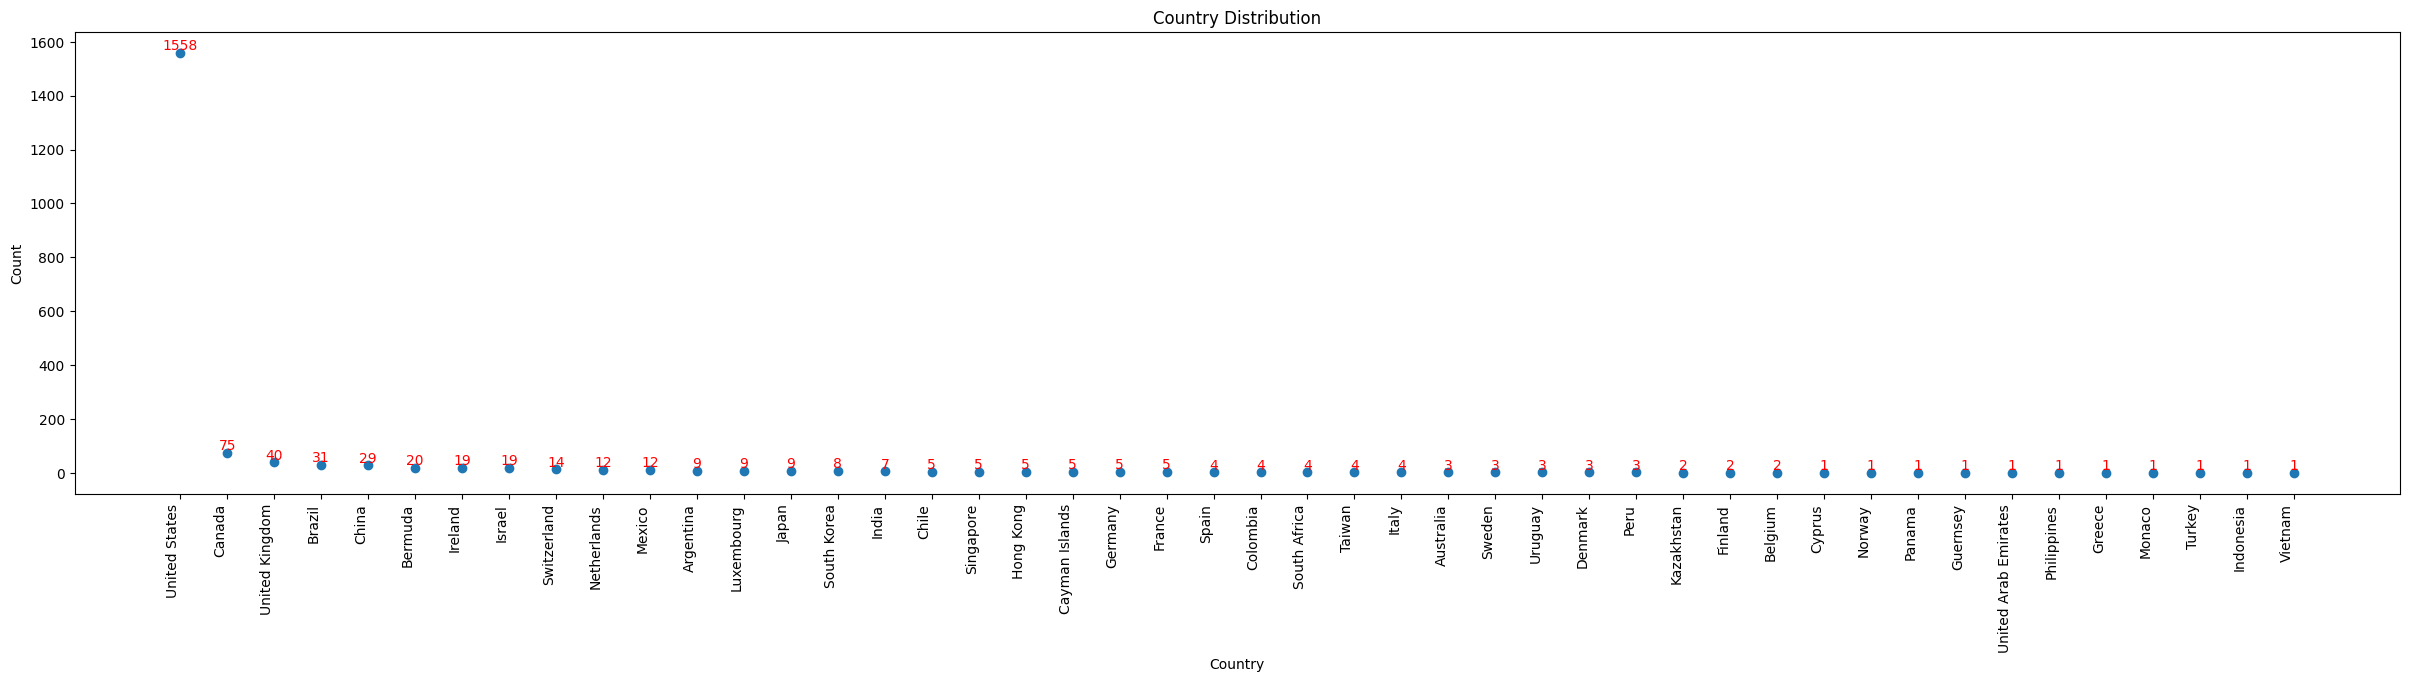

In [187]:

country_counts = data['Country'].value_counts()

plt.figure(figsize=(30, 6))
plt.plot(country_counts.index, country_counts.values, 'o')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Add values on each point
for i, (country, count) in enumerate(zip(country_counts.index, country_counts.values)):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, color='red')

plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Country Distribution")

plt.show()


In [127]:
data = data.drop(columns=['Unnamed: 0', 'SP500'])

In [128]:
data['S&P500'] = data['S&P500'].apply(lambda x: 'Yes' if x == 'S&P 500' else 'No')
data

,Company_Name,Symbol,Market_Cap,Ent_Value,Close,Rev,EBITDA,T_PE,F_PE,ROE,...,Opportunity Type,S&P500,Change_2d,Change_5d,Change_10d,Change_30d,Change_60d,Change_180d,MTD Change,YTD Change
0,"Agilent Technologies, Inc.",A,34,36,121,6,1,27.76,21.4,0.21,...,Neutral,Yes,0.01,NaN,0.06,0.19,0.14,0.13,-0.05,-0.10
1,Alcoa Corporation,AA,8,9,30,11,1,122.92,10.0,0.00,...,Neutral,No,-0.03,NaN,0.04,0.15,0.12,0.01,-0.04,-0.15
2,"American Airlines Group, Inc.",AAL,7,37,12,54,5,9.24,5.7,NaN,...,Neutral,No,0.09,NaN,0.25,0.45,0.60,-0.07,-0.20,-0.34
3,"AAON, Inc.",AAON,6,6,79,1,0,40.79,28.1,0.22,...,Neutral,No,-0.03,NaN,-0.07,0.37,0.48,0.14,0.07,-0.30
4,Advance Auto Parts Inc.,AAP,2,4,36,9,0,NaN,13.6,-0.25,...,Neutral,No,0.00,NaN,0.01,0.24,0.27,0.12,-0.01,-0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,"Zoom Communications, Inc.",ZM,22,14,73,4,0,22.79,13.8,0.12,...,Neutral,No,0.00,NaN,0.01,0.19,0.09,-0.08,-0.01,-0.10
2148,"Zscaler, Inc.",ZS,30,28,194,2,0,NaN,56.0,-0.01,...,Good Opp,No,-0.02,NaN,-0.02,0.07,-0.05,-0.15,0.02,0.11
2149,ZTO Express (Cayman) Inc.,ZTO,16,11,20,41,14,13.56,10.0,0.14,...,Good Opp,No,0.02,NaN,-0.01,0.00,-0.09,0.12,0.01,0.01
2150,Zoetis Inc.,ZTS,73,78,171,9,3,30.05,25.9,0.51,...,Good Opp,Yes,0.05,NaN,0.02,0.05,-0.01,0.16,-0.02,0.01


In [132]:
changes = changes.drop_duplicates(subset=['Symbol'])
changes

,Symbol,Change_2d,Change_5d,Change_10d,Change_30d,Change_60d,Change_180d,MTD Change,YTD Change
0,A,0.01,NaN,0.06,0.19,0.14,0.13,-0.05,-0.10
1,AA,-0.03,NaN,0.04,0.15,0.12,0.01,-0.04,-0.15
2,AAL,0.09,NaN,0.25,0.45,0.60,-0.07,-0.20,-0.34
3,AAON,-0.03,NaN,-0.07,0.37,0.48,0.14,0.07,-0.30
4,AAP,0.00,NaN,0.01,0.24,0.27,0.12,-0.01,-0.22
...,...,...,...,...,...,...,...,...,...
1951,ZM,0.00,NaN,0.01,0.19,0.09,-0.08,-0.01,-0.10
1952,ZS,-0.02,NaN,-0.02,0.07,-0.05,-0.15,0.02,0.11
1953,ZTO,0.02,NaN,-0.01,0.00,-0.09,0.12,0.01,0.01
1954,ZTS,0.05,NaN,0.02,0.05,-0.01,0.16,-0.02,0.01


In [65]:
# Convert all object columns to datetime format
data[['Ex_Div_Date', 'Last_Fiscal_Year_End', 'Next_Fiscal_Year_End', 
      'Most_Recent_Quarter', 'Last_Split_Date', 'Last_Div_Date', 
      'Last_Update']] = data[['Ex_Div_Date', 'Last_Fiscal_Year_End', 'Next_Fiscal_Year_End', 
                              'Most_Recent_Quarter', 'Last_Split_Date', 'Last_Div_Date', 
                              'Last_Update']].apply(pd.to_datetime, errors='coerce')


In [66]:
data.dtypes

Company_Name     object
Symbol           object
Market_Cap        int64
Ent_Value         int64
Close             int64
                 ...   
Change_30d      float64
Change_60d      float64
Change_180d     float64
MTD Change      float64
YTD Change      float64
Length: 101, dtype: object

In [67]:
data

,Company_Name,Symbol,Market_Cap,Ent_Value,Close,Rev,EBITDA,T_PE,F_PE,ROE,...,Opportunity Type,S&P500,Change_2d,Change_5d,Change_10d,Change_30d,Change_60d,Change_180d,MTD Change,YTD Change
0,"Agilent Technologies, Inc.",A,34,36,121,6,1,27.76,21.4,0.21,...,Neutral,Yes,0.01,NaN,0.06,0.19,0.14,0.13,-0.05,-0.10
1,Alcoa Corporation,AA,8,9,30,11,1,122.92,10.0,0.00,...,Neutral,No,-0.03,NaN,0.04,0.15,0.12,0.01,-0.04,-0.15
2,"American Airlines Group, Inc.",AAL,7,37,12,54,5,9.24,5.7,NaN,...,Neutral,No,0.09,NaN,0.25,0.45,0.60,-0.07,-0.20,-0.34
3,"AAON, Inc.",AAON,6,6,79,1,0,40.79,28.1,0.22,...,Neutral,No,-0.03,NaN,-0.07,0.37,0.48,0.14,0.07,-0.30
4,Advance Auto Parts Inc.,AAP,2,4,36,9,0,NaN,13.6,-0.25,...,Neutral,No,0.00,NaN,0.01,0.24,0.27,0.12,-0.01,-0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,"Zoom Communications, Inc.",ZM,22,14,73,4,0,22.79,13.8,0.12,...,Neutral,No,0.00,NaN,0.01,0.19,0.09,-0.08,-0.01,-0.10
2148,"Zscaler, Inc.",ZS,30,28,194,2,0,NaN,56.0,-0.01,...,Good Opp,No,-0.02,NaN,-0.02,0.07,-0.05,-0.15,0.02,0.11
2149,ZTO Express (Cayman) Inc.,ZTO,16,11,20,41,14,13.56,10.0,0.14,...,Good Opp,No,0.02,NaN,-0.01,0.00,-0.09,0.12,0.01,0.01
2150,Zoetis Inc.,ZTS,73,78,171,9,3,30.05,25.9,0.51,...,Good Opp,Yes,0.05,NaN,0.02,0.05,-0.01,0.16,-0.02,0.01


In [68]:
last_update = data[['Last_Update']]
last_update = last_update.loc[0]

In [69]:
last_update

Last_Update   2025-03-12
Name: 0, dtype: datetime64[ns]

In [70]:
import pandas as pd

# Example DataFrame
data = {'A': [1, 2, 3]}
df = pd.DataFrame(data)

# Get the first row
first_row = df.iloc[0]
first_row


A    1
Name: 0, dtype: int64

In [71]:
columns = data.columns.tolist()
columns = pd.DataFrame(columns)
columns

AttributeError: 'dict' object has no attribute 'columns'

NameError: name 'last_update' is not defined

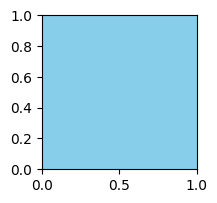

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

date = 123

# Create a figure and axis
fig, ax = plt.subplots(figsize=(2, 2))

# Add a rectangle (for the card background)
card = patches.FancyBboxPatch((0, 0), 1, 1, boxstyle="round,pad=0.1", linewidth=2, edgecolor='black', facecolor='skyblue')
ax.add_patch(card)

# Add text to represent the card value (like a card showing "Value: 100")
ax.text(0.5, 0.5, last_update, ha='center', va='center', fontsize=20, color='black')

# Remove axis
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Show the plot
plt.show()


In [147]:
data = data.drop(columns="Unnamed: 0")
data

,Company_Name,Symbol,Market_Cap,Ent_Value,Close,Rev,EBITDA,T_PE,F_PE,ROE,...,Day_High,ND_to_EBITDA,PCT_Below_Low,PCT_to_Low,PCT_to_Mean,Net_Debt,Last_Update,Opportunity Type,SP500,S&P500
0,"Agilent Technologies, Inc.",A,34,36,121,6,1,27.76,21.4,0.21,...,123.28,1.15,-0.10,0.11,0.24,2.073000e+09,3/12/2025,Neutral,S&P 500,S&P 500
1,Alcoa Corporation,AA,8,9,30,11,1,122.92,10.0,0.00,...,32.43,1.10,-0.23,0.29,0.55,1.718000e+09,3/12/2025,Neutral,No S&P 500,No S&P 500
2,"American Airlines Group, Inc.",AAL,7,37,12,54,5,9.24,5.7,NaN,...,12.54,5.33,-0.11,0.12,0.66,2.992600e+10,3/12/2025,Neutral,No S&P 500,No S&P 500
3,"AAON, Inc.",AAON,6,6,79,1,0,40.79,28.1,0.22,...,83.50,0.14,-0.17,0.20,0.38,3.714100e+07,3/12/2025,Neutral,No S&P 500,No S&P 500
4,Advance Auto Parts Inc.,AAP,2,4,36,9,0,NaN,13.6,-0.25,...,38.20,7.14,1.81,-0.64,0.14,2.278437e+09,3/12/2025,Neutral,No S&P 500,No S&P 500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,"Zoom Communications, Inc.",ZM,22,14,73,4,0,22.79,13.8,0.12,...,74.87,-8.24,0.05,-0.05,0.24,-7.727277e+09,3/12/2025,Neutral,No S&P 500,No S&P 500
1952,"Zscaler, Inc.",ZS,30,28,194,2,0,NaN,56.0,-0.01,...,202.64,32.44,-0.00,0.00,0.21,-1.641898e+09,3/12/2025,Good Opp,No S&P 500,No S&P 500
1953,ZTO Express (Cayman) Inc.,ZTO,16,11,20,41,14,13.56,10.0,0.14,...,20.56,-0.33,-0.01,0.01,0.32,-4.626692e+09,3/12/2025,Good Opp,No S&P 500,No S&P 500
1954,Zoetis Inc.,ZTS,73,78,171,9,3,30.05,25.9,0.51,...,171.82,1.26,0.00,-0.00,0.18,4.842000e+09,3/12/2025,Good Opp,S&P 500,S&P 500


In [ ]:
data = data.set_index('Symbol')
data

,Company_Name,Market_Cap,Ent_Value,Close,Rev,EBITDA,T_PE,F_PE,ROE,ROA,...,SP500,S&P500,Change_2d,Change_5d,Change_10d,Change_30d,Change_60d,Change_180d,MTD Change,YTD Change
Symbol,,,,,,,,,,,,,,,,,,,,,
A,"Agilent Technologies, Inc.",34,36,121,6,1,27.759172,21.4,0.20614,0.08393,...,S&P 500,S&P 500,0.007188,NaN,0.056928,0.187226,0.135834,0.130619,-0.053862,-0.099077
AA,Alcoa Corporation,8,9,30,11,1,122.923080,10.0,0.00436,0.04089,...,No S&P 500,No S&P 500,-0.030663,NaN,0.037042,0.151507,0.120006,0.011825,-0.035719,-0.151341
AAL,"American Airlines Group, Inc.",7,37,12,54,5,9.241936,5.7,NaN,0.03374,...,No S&P 500,No S&P 500,0.090750,NaN,0.252182,0.450262,0.603839,-0.067190,-0.201394,-0.342513
AAON,"AAON, Inc.",6,6,79,1,0,40.787130,28.1,0.21613,0.12447,...,No S&P 500,No S&P 500,-0.031557,NaN,-0.067848,0.374803,0.481612,0.141700,0.072786,-0.299881
AAP,Advance Auto Parts Inc.,2,4,36,9,0,NaN,13.6,-0.25032,0.00147,...,No S&P 500,No S&P 500,0.001643,NaN,0.010405,0.238773,0.265060,0.120676,-0.010298,-0.223480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZM,"Zoom Communications, Inc.",22,14,73,4,0,22.788162,13.8,0.11917,0.04868,...,No S&P 500,No S&P 500,0.004375,NaN,0.007519,0.190704,0.086261,-0.076008,-0.007463,-0.103664
ZS,"Zscaler, Inc.",30,28,194,2,0,NaN,56.0,-0.01210,-0.01409,...,No S&P 500,No S&P 500,-0.023425,NaN,-0.015700,0.066061,-0.047051,-0.146970,0.015951,0.105039
ZTO,ZTO Express (Cayman) Inc.,16,11,20,41,14,13.558620,10.0,0.14484,0.07713,...,No S&P 500,No S&P 500,0.017803,NaN,-0.013733,0.000000,-0.087996,0.119532,0.013925,0.005627


In [ ]:
short = data[['Symbol', 'Market_Cap']].sort_values(by='Market_Cap', ascending=False).head(100)
short 

,Symbol,Market_Cap
5,AAPL,3317
1163,MSFT,2828
1244,NVDA,2653
109,AMZN,2083
1111,META,1534
...,...,...
1847,VRTX,125
270,BMY,124
300,BUD,123
423,COP,121


In [200]:
pt_industry = pd.pivot_table(data, values=['Market_Cap', 'Ent_Value', 'EBITDA', 'Rev',], index='Sector', aggfunc=np.sum)
pt_industry = pt_industry.sort_values(by='Market_Cap', ascending=False)
pt_industry.reset_index(inplace=True)
pt_industry

C:\Users\Nino\AppData\Local\Temp\ipykernel_2236\1827524676.py:1: FutureWarning: The provided callable <function sum at 0x000001964937EE50> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pt_industry = pd.pivot_table(data, values=['Market_Cap', 'Ent_Value', 'EBITDA', 'Rev',], index='Sector', aggfunc=np.sum)


,Sector,EBITDA,Ent_Value,Market_Cap,Rev
0,Technology,6804,23458,18800,23848
1,Financial Services,1194,17962,9326,108284
2,Healthcare,1950,13306,7502,9133
3,Consumer Cyclical,-21434,198336,7474,112001
4,Industrials,360,6623,5270,2504
5,Consumer Defensive,848,6554,4272,6831
6,Communication Services,89305,88165,4023,201900
7,Energy,55644,135726,3711,141558
8,Basic Materials,6512,28097,1837,74452
9,Utilities,2131,8738,1502,7704


In [201]:
empty_data = data[data['PCT_to_Low'].isna()]
data = data.drop(empty_data.index)

In [202]:
pt_industry_2 = pd.pivot_table(data, values=['Beta', 'Rec_Mean', 'EBITDA', 'Payout_Ratio','PCT_to_Low', 'PCT_to_Mean'], index='Sector', aggfunc=np.average)
pt_industry_2 = pt_industry_2.sort_values(by='EBITDA', ascending=False)
pt_industry_2.reset_index(inplace=True)
pt_industry_2

,Sector,Beta,EBITDA,PCT_to_Low,PCT_to_Mean,Payout_Ratio
0,Communication Services,NaN,1050.647059,-0.023059,0.262824,0.683529
1,Energy,NaN,441.619048,0.096190,0.385873,1.385714
2,Basic Materials,NaN,61.433962,0.060283,0.284906,1.805000
3,Utilities,NaN,30.884058,-0.074638,0.153768,1.344203
4,Technology,NaN,22.381579,0.034868,0.362500,1.059901
5,Consumer Defensive,NaN,8.396040,-0.073861,0.161287,0.506931
6,Healthcare,NaN,8.024691,0.098765,0.566337,0.676255
7,Financial Services,NaN,4.389706,0.056581,0.245809,0.519412
8,Industrials,NaN,1.343284,0.007687,0.257351,0.263694
9,Real Estate,1.244757,0.611650,-0.021942,0.149612,3.650388


In [203]:
pt_industry_2 = pd.merge(pt_industry_2, pt_industry, on = 'Sector', how='left')
pt_industry_2

,Sector,Beta,EBITDA_x,PCT_to_Low,PCT_to_Mean,Payout_Ratio,EBITDA_y,Ent_Value,Market_Cap,Rev
0,Communication Services,NaN,1050.647059,-0.023059,0.262824,0.683529,89305,88165,4023,201900
1,Energy,NaN,441.619048,0.096190,0.385873,1.385714,55644,135726,3711,141558
2,Basic Materials,NaN,61.433962,0.060283,0.284906,1.805000,6512,28097,1837,74452
3,Utilities,NaN,30.884058,-0.074638,0.153768,1.344203,2131,8738,1502,7704
4,Technology,NaN,22.381579,0.034868,0.362500,1.059901,6804,23458,18800,23848
5,Consumer Defensive,NaN,8.396040,-0.073861,0.161287,0.506931,848,6554,4272,6831
6,Healthcare,NaN,8.024691,0.098765,0.566337,0.676255,1950,13306,7502,9133
7,Financial Services,NaN,4.389706,0.056581,0.245809,0.519412,1194,17962,9326,108284
8,Industrials,NaN,1.343284,0.007687,0.257351,0.263694,360,6623,5270,2504
9,Real Estate,1.244757,0.611650,-0.021942,0.149612,3.650388,63,2333,1486,317


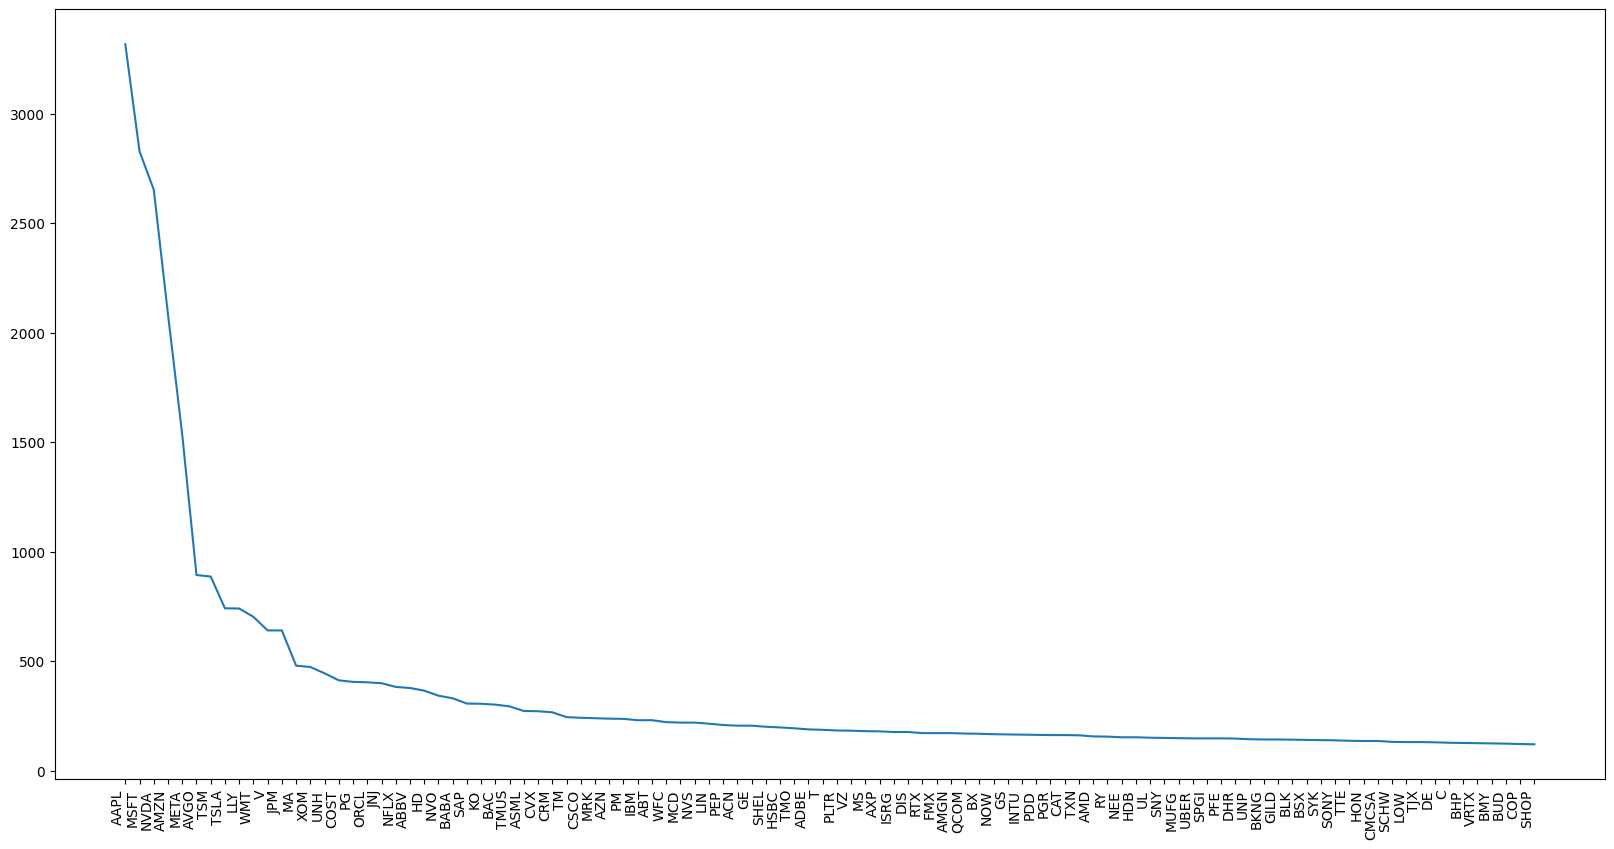

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(short['Symbol'], short['Market_Cap'])  # x-axis is index, y-axis is Market_Cap
plt.xticks(rotation=90, ha='right')  # Rotates and aligns text to the right

plt.show()

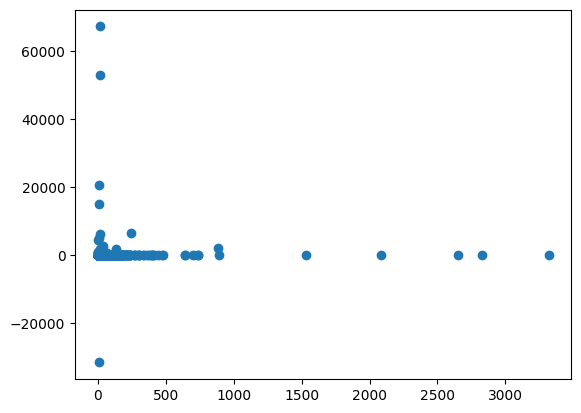

In [ ]:
plt.scatter(data['Market_Cap'], data['EBITDA'])
plt.xlabel('Market Cap')

In [ ]:
abv = pd.DataFrame(data.dtypes, columns=['dtype'])
abv['dtype'] = abv['dtype'].astype(str)
abv

,dtype
Company_Name,object
Symbol,object
Market_Cap,int64
Ent_Value,int64
Close,int64
...,...
Change_30d,float64
Change_60d,float64
Change_180d,float64
MTD Change,float64


In [ ]:
abv = abv.query('dtype == "object"')
abv


,dtype
Company_Name,object
Symbol,object
Rec_Key,object
Sector,object
Industry,object
State,object
Country,object
Web_Site,object
Business_Summary,object
Last_Split_Factor,object


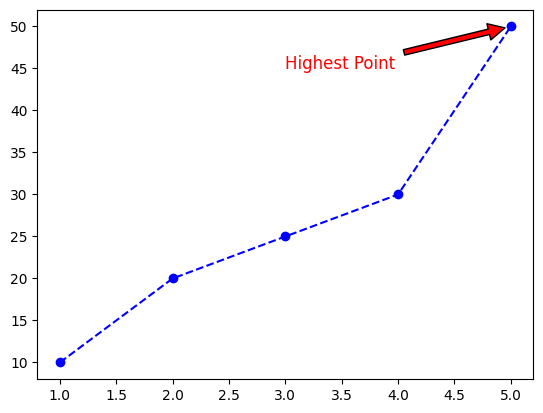

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 50]

plt.plot(x, y, marker='o', linestyle='--', color='b')

# Adding annotation with an arrow
plt.annotate("Highest Point", xy=(5, 50), xytext=(3, 45),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color="red")

plt.show()



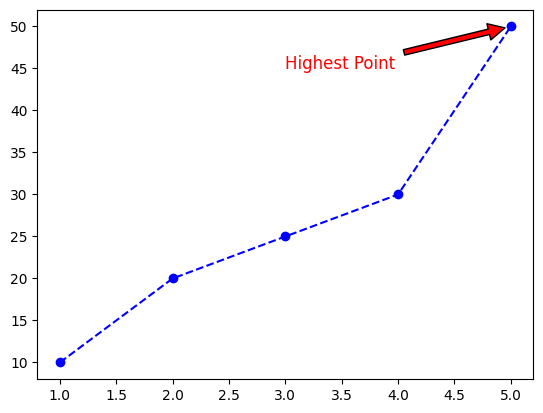

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 50]

plt.plot(x, y, marker='o', linestyle='--', color='b')

# Adding annotation with an arrow
plt.annotate("Highest Point", xy=(5, 50), xytext=(3, 45),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color="red")

plt.show()


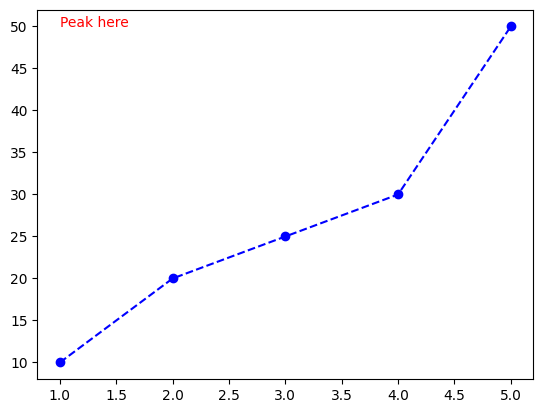

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 50]

plt.plot(x, y, marker='o', linestyle='--', color='b')

# Adding a comment inside the plot
plt.text(1, 50, "Peak here", fontsize=10, color="red")

plt.show()



In [50]:
import pandas as pd

df = pd.DataFrame({
    'text': [
        'I love this product!',
        'This is the worst experience ever.',
        'It was okay, nothing special.',
        'Absolutely fantastic!',
        'Terrible, would not recommend.'
    ],
    'sentiment': ['positive', 'negative', 'neutral', 'positive', 'negative']
})


C:\Users\Nino\AppData\Local\Temp\ipykernel_24852\1743927764.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='count', data=sentiment_counts, palette='viridis')


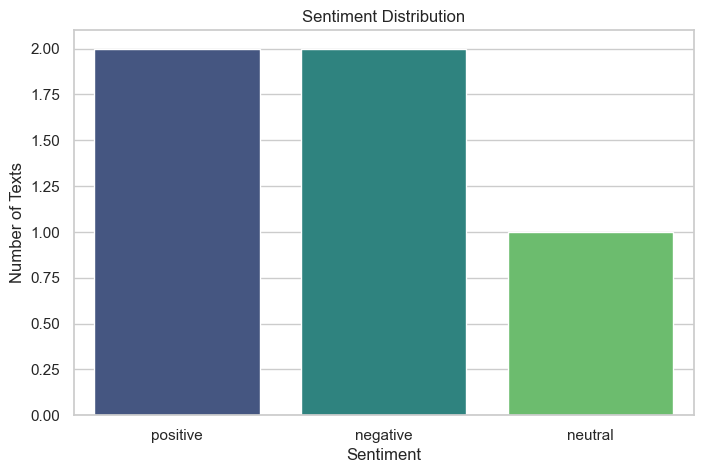

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count each sentiment
sentiment_counts = df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x='sentiment', y='count', data=sentiment_counts, palette='viridis')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Texts')
plt.show()


In [52]:
import pandas as pd

df = pd.DataFrame({
    'text': [
        'Love this!',
        'Awful experience.',
        'Just okay.',
        'Amazing quality.',
        'Not good at all.'
    ],
    'sentiment_score': [0.8, -0.9, 0.0, 0.95, -0.6]
})


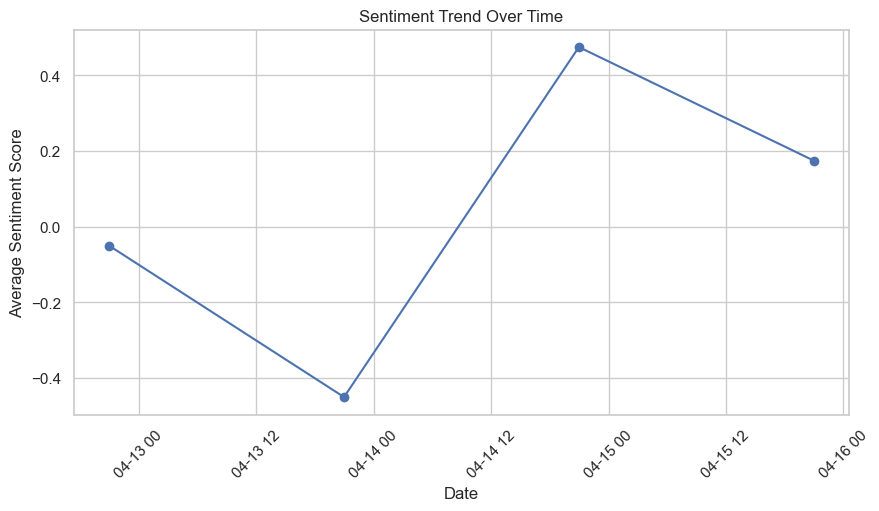

In [56]:
df['date'] = pd.date_range(end=pd.Timestamp.today(), periods=len(df))

# Rolling average for smoothness (optional)
df['rolling_sentiment'] = df['sentiment_score'].rolling(window=2).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['rolling_sentiment'], marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [54]:
import plotly.graph_objs as go
import pandas as pd
from IPython.display import display
import ipywidgets as widgets

# Example DataFrame (replace this with your actual DataFrame)
# df = pd.DataFrame({
#     'Ticker': ['AAPL', 'GOOG', 'MSFT'],
#     'Log10EnterpriseValue': [12.3, 13.1, 12.8],
#     'OtherInfo': ['Apple Inc.', 'Alphabet Inc.', 'Microsoft Corp.']
# })

# Replace 'df' with your actual DataFrame variable name
scatter = go.Scatter(
    x=df['Ticker'],
    y=df['Log10EnterpriseValue'],
    mode='markers',
    marker=dict(size=12),
    text=df['Ticker'],
    customdata=df[['OtherInfo']],  # Add more columns as needed
    hovertemplate='Ticker: %{text}<br>Log10 EV: %{y}<br>Other: %{customdata[0]}<extra></extra>'
)

fig = go.FigureWidget(data=[scatter])
fig.update_layout(
    title="Enterprise Value Scatter Plot",
    xaxis_title="Ticker",
    yaxis_title="Log10 Enterprise Value"
)

output = widgets.Output()

def on_point_click(trace, points, selector):
    with output:
        output.clear_output()
        if points.point_inds:
            idx = points.point_inds[0]
            ticker = df.iloc[idx]['Ticker']
            ev = df.iloc[idx]['Log10EnterpriseValue']
            other = df.iloc[idx]['OtherInfo']
            print(f"Ticker: {ticker}\nLog10 Enterprise Value: {ev}\nOther Info: {other}")

scatter.on_click(on_point_click)

display(fig, output)

NameError: name 'df' is not defined